# Census Income Project

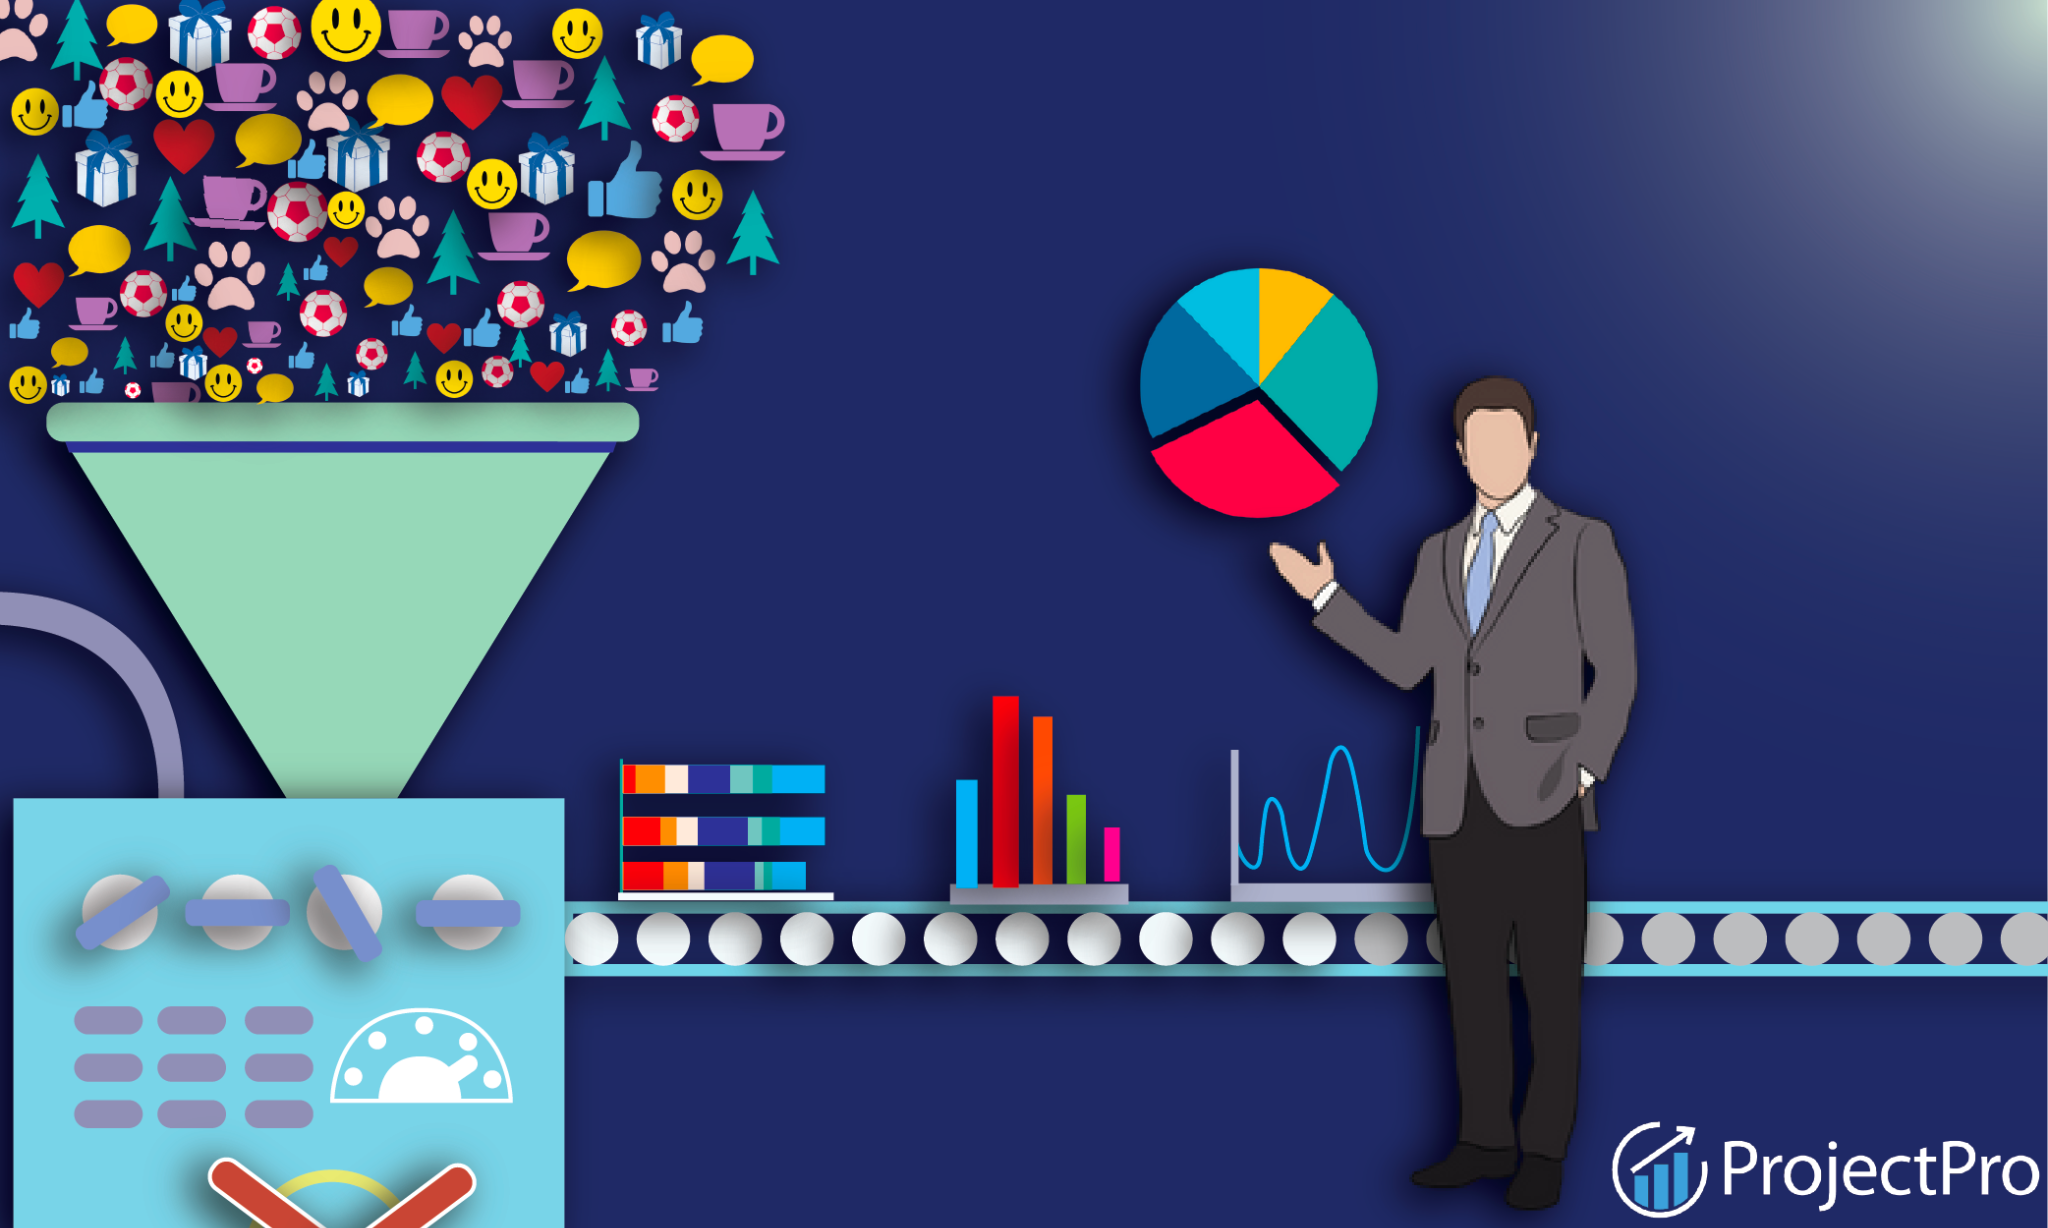

**Image:ProjectPro**

# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).**The prediction task is to determine whether a person makes over $50K a year.**


# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# Dataset Link-

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Census%20Income/Census%20Income.csv



In [1]:
#Importing necessory libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Retrive the dataset using the path of the dataset
df=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv")

In [3]:
df.head(10) #Display the first 10 rows

Age          Workclass  Fnlwgt      Education  Education_num  \
0   50   Self-emp-not-inc   83311      Bachelors             13   
1   38            Private  215646        HS-grad              9   
2   53            Private  234721           11th              7   
3   28            Private  338409      Bachelors             13   
4   37            Private  284582        Masters             14   
5   49            Private  160187            9th              5   
6   52   Self-emp-not-inc  209642        HS-grad              9   
7   31            Private   45781        Masters             14   
8   42            Private  159449      Bachelors             13   
9   37            Private  280464   Some-college             10   

           Marital_status          Occupation    Relationship    Race  \
0      Married-civ-spouse     Exec-managerial         Husband   White   
1                Divorced   Handlers-cleaners   Not-in-family   White   
2      Married-civ-spouse   Handlers-cleaners         Husband   Black   
3      Married-civ-spouse      Prof-specialty            Wife   Black   
4      Married-civ-spouse     Exec-managerial            Wife   White   
5   Married-spouse-absent       Other-service   Not-in-family   Black   
6      Married-civ-spouse     Exec-managerial         Husband   White   
7           Never-married      Prof-specialty   Not-in-family   White   
8      Married-civ-spouse     Exec-managerial         Husband   White   
9      Married-civ-spouse     Exec-managerial         Husband   Black   

       Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0     Male             0             0              13   United-States   <=50K  
1     Male             0             0              40   United-States   <=50K  
2     Male             0             0              40   United-States   <=50K  
3   Female             0             0              40            Cuba   <=50K  
4   Female             0             0              40   United-States   <=50K  
5   Female             0             0              16         Jamaica   <=50K  
6     Male             0             0              45   United-States    >50K  
7   Female         14084             0              50   United-States    >50K  
8     Male          5178             0              40   United-States    >50K  
9     Male             0             0              80   United-States    >50K

In [4]:
df.tail(10) #Display the last 10 rows

Age      Workclass  Fnlwgt      Education  Education_num  \
32550   32        Private   34066           10th              6   
32551   43        Private   84661      Assoc-voc             11   
32552   32        Private  116138        Masters             14   
32553   53        Private  321865        Masters             14   
32554   22        Private  310152   Some-college             10   
32555   27        Private  257302     Assoc-acdm             12   
32556   40        Private  154374        HS-grad              9   
32557   58        Private  151910        HS-grad              9   
32558   22        Private  201490        HS-grad              9   
32559   52   Self-emp-inc  287927        HS-grad              9   

            Marital_status          Occupation    Relationship  \
32550   Married-civ-spouse   Handlers-cleaners         Husband   
32551   Married-civ-spouse               Sales         Husband   
32552        Never-married        Tech-support   Not-in-family   
32553   Married-civ-spouse     Exec-managerial         Husband   
32554        Never-married     Protective-serv   Not-in-family   
32555   Married-civ-spouse        Tech-support            Wife   
32556   Married-civ-spouse   Machine-op-inspct         Husband   
32557              Widowed        Adm-clerical       Unmarried   
32558        Never-married        Adm-clerical       Own-child   
32559   Married-civ-spouse     Exec-managerial            Wife   

                      Race      Sex  Capital_gain  Capital_loss  \
32550   Amer-Indian-Eskimo     Male             0             0   
32551                White     Male             0             0   
32552   Asian-Pac-Islander     Male             0             0   
32553                White     Male             0             0   
32554                White     Male             0             0   
32555                White   Female             0             0   
32556                White     Male             0             0   
32557                White   Female             0             0   
32558                White     Male             0             0   
32559                White   Female         15024             0   

       Hours_per_week  Native_country  Income  
32550              40   United-States   <=50K  
32551              45   United-States   <=50K  
32552              11          Taiwan   <=50K  
32553              40   United-States    >50K  
32554              40   United-States   <=50K  
32555              38   United-States   <=50K  
32556              40   United-States    >50K  
32557              40   United-States   <=50K  
32558              20   United-States   <=50K  
32559              40   United-States    >50K

**==>This data was extracted from the 1994 Census bureau database.**

**==>The prediction task is to determine whether a person makes over $50K a year.**

# 1.Exploratory Data Analysis (EDA)

### 1.1 Dimension of the Dataset

In [5]:
df.shape #checking the dimension of the dataset

(32560, 15)

Data set contains **32560 rows and 15 Columns**(from this 1 column is target variable ,then other 14 are independent variables)

### 1.2 Columns of the Dataset

In [6]:
print(f"Columns Names:{df.columns}") #columns of the dataset

Columns Names:Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')


Here **Income is our Target Variable**

### 1.3 Datatype of the Columns

In [7]:
# checking the datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This dataset contains

==>**6 int64(integers)** value columns

==>**9 object(string)** value columns

The dataset **does'nt have null values**.

# 1.4 Missing values

In [8]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
Age                       0           0.0
Workclass                 0           0.0
Fnlwgt                    0           0.0
Education                 0           0.0
Education_num             0           0.0
Marital_status            0           0.0
Occupation                0           0.0
Relationship              0           0.0
Race                      0           0.0
Sex                       0           0.0
Capital_gain              0           0.0
Capital_loss              0           0.0
Hours_per_week            0           0.0
Native_country            0           0.0
Income                    0           0.0

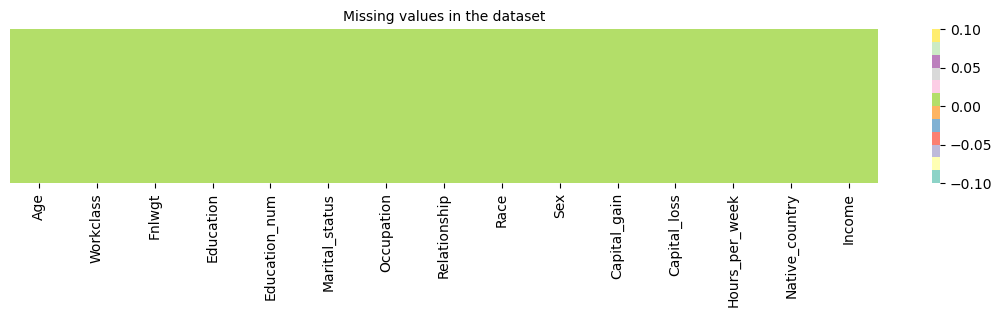

In [9]:
# Let's visualize it using heatmap for dataset
plt.figure(figsize=(14,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Set3')
plt.title('Missing values in the dataset', fontsize=10);

Once again we can see, the dataset does not have null values.

# 1.5 Features Analysis

### 1.5.1 Unique Values

Next, we’ll explore the distinct values present in each column of the dataset to **gain insights into the data and its features.**

In [10]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of Unique values')
info_df['type'] = df.dtypes.values

info_df

No. of Unique values    type
Age                               73   int64
Workclass                          9  object
Fnlwgt                         21647   int64
Education                         16  object
Education_num                     16   int64
Marital_status                     7  object
Occupation                        15  object
Relationship                       6  object
Race                               5  object
Sex                                2  object
Capital_gain                     119   int64
Capital_loss                      92   int64
Hours_per_week                    94   int64
Native_country                    42  object
Income                             2  object

In [11]:
# Checking for columns with one unique value or have the same unique values as rows has the dataset
info_df[(info_df['No. of Unique values'] == 1) | (info_df['No. of Unique values'] == df.shape[0]) ]

Empty DataFrame
Columns: [No. of Unique values, type]
Index: []

From above analysis:


 ==>The dataset contains the following **categorical variables**: Workclass(9), Education(16), Marital_status(7), Occupation(15), Relationship(6), Race(5), Sex(2), Native_country(42), Income(2) with its respective unique values.

 ==>The **numerical columns** in the dataset are: Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, and Hours_per_week.

 ==>However, the numerical columns but Education_num are **discrete** and have a small number of unique values. They could be analyzed as categorical during EDA.

### 1.5.1.1 Income unique values

In [12]:
# Checking the target variable
df['Income'].value_counts().to_frame()

count
Income       
 <=50K  24719
 >50K    7841

The target variable has two unique values: <=50K or >50K. The dataset is imbalance.

### Custom function for showing percentange in the graph

In [13]:
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

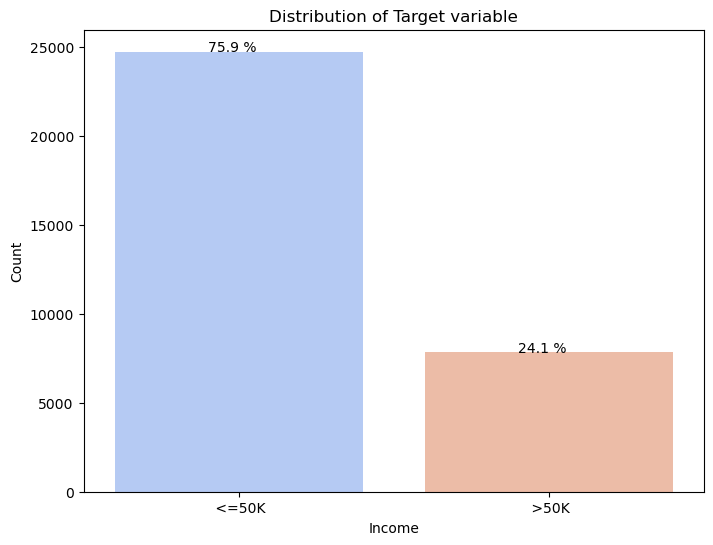

In [14]:
# Visualize the distribution of Income
col = 'Income'
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x=col, palette='coolwarm')
show_percentage(ax, len(df))
plt.title('Distribution of Target variable')
plt.xlabel(col)
plt.ylabel('Count')
plt.show()

The dataset exhibits an imbalance, with a substantial majority (75.9%) of records falling into the ‘<=50K’ category, while only 24.1% belong to the ‘>50K’ category. To address this, we’ll apply an oversampling technique later on

### 1.5.1.2 Categorical variables unique values

In [15]:
# Separating Numerical and Categorical columns
categorical_col = []
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {categorical_col}\n")
print(f"Numerical Columns:\n {numerical_col}\n")

Categorical Columns:
 ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

Numerical Columns:
 ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']



In [16]:
# Checking the value counts of the categorical independent variables
for i, col in enumerate(categorical_col[:]):
    print(f"{i+1}.{col}:\n{df[col].value_counts()}\n")

1.Workclass:
Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

2.Education:
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

3.Marital_status:
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

4.Occ

These are the unique values for the categorical independent variables. In the Workclass, Occupation and Native_country columns are observations classified as "?" which means that these values are unknown or missing.

### 1.5.1.3 Numerical variables unique values


In [17]:
# Checking the value counts of the numerical independent variables
for i, col in enumerate(numerical_col):
    print(f"{i+1}.{col}:\n{df[col].value_counts()}\n")

1.Age:
Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

2.Fnlwgt:
Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64

3.Education_num:
Education_num
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

4.Capital_gain:
Capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

5.Capital_loss:
Capital_loss
0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1

In [18]:
print(f"% of zeros in Capital_gain column is {df.Capital_gain.value_counts(normalize=True)[0]*100:.2f}%")
print(f"% of zeros in Capital_loss column is {df.Capital_loss.value_counts(normalize=True)[0]*100:.2f}%")

% of zeros in Capital_gain column is 91.67%
% of zeros in Capital_loss column is 95.33%


These are the unique values for the numerical independent variables. The Capital_gain and Capital_loss columns have a large number of zeros, 91.67% and 95.33% respectively.

### 1.5.2 Summary statistics of the numerical variables and non-numerical variables¶

In [19]:
# Summary statistics of numerical columns
stats = df.describe()

stats


Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [20]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

Fnlwgt            11418.814373
Capital_gain       1077.615172
Capital_loss         87.306511
Age                   1.581634
Hours_per_week        0.437469
Education_num         0.080590
dtype: float64

In [21]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

Fnlwgt            1.083824e+06
Capital_gain      8.415058e+04
Capital_loss      3.462761e+03
Hours_per_week    3.386729e+01
Age               2.413708e+01
Education_num     7.739924e-01
dtype: float64

==>There is **no negative value present**

==>There is **no missing values**

==>The mean value is greater than the median(50%)generation  Fnlwgt, Capital_gain, and Capital_loss columns which means the **data is skewed to right**.

==>>By summarizing the data we can observe there is a huge difference between 75% and max in many columns, hence there are **outliers presented in the data**

==>==>we can also notice the **standard deviation,min,25% percentile** value from this describe method

In [22]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

Workclass Education       Marital_status       Occupation Relationship  \
count      32560     32560                32560            32560        32560   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          Race    Sex  Native_country  Income  
count    32560  32560           32560   32560  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27815  21789           29169   24719

Here we can see the number of unique values for each categorical variable as well as the most frequent value.

### 1.5.3 Duplicates

In [23]:
# Searching for duplicated values
df[df.duplicated()].shape

(24, 15)

There are **24 duplicate values** presents in the dataset.

### Removing duplicates

In [24]:
df = df.drop_duplicates()

In [25]:
# Searching for duplicated values
df[df.duplicated()].shape

(0, 15)

In [26]:
df.shape #checking the new dimension of the dataset

(32536, 15)

### 1.5.4 Preprocessing Education

For the Education feature, we will take some considerations in order to sharpen our analysis. We will combine some categories into more representative ones, as follows:

In [27]:
# Define the mapping for combining categories
category_mapping = {
    'Assoc-voc': 'Associate',
    'Assoc-acdm': 'Associate',
    '11th': 'Below High School',
    '10th': 'Below High School',
    '7th-8th': 'Below High School',
    '9th': 'Below High School',
    '12th': 'Below High School',
    '5th-6th': 'Below High School',
    '1st-4th': 'Below High School',
    'Preschool': 'Below High School'
}
col = 'Education'

# Eliminating extra spaces 
df[col] = df[col].str.strip()

# In column Education_bk will reserve the original values
df['Education_bk'] = df[col]

# Assing the combined categories
df[col] = df[col].replace(category_mapping)
df[col].unique()

array(['Bachelors', 'HS-grad', 'Below High School', 'Masters',
       'Some-college', 'Associate', 'Doctorate', 'Prof-school'],
      dtype=object)

Now the Education variable has 8 more general categories.

### 1.5.5 Setting the order in the categories

In [28]:
# Define the order for the category Education with original values.
col = 'Education_bk'
order_cat =  ['Doctorate', 'Masters', 'Bachelors', 'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college','HS-grad', 
              '11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool']
df[col] = pd.Categorical(df[col], categories=order_cat, ordered=True)

# Confirming setting the category
print(f"Categories for {col}:")
display(df[col].dtype)

Categories for Education_bk:


CategoricalDtype(categories=['Doctorate', 'Masters', 'Bachelors', 'Assoc-voc',
                  'Assoc-acdm', 'Prof-school', 'Some-college', 'HS-grad',
                  '11th', '10th', '7th-8th', '9th', '12th', '5th-6th',
                  '1st-4th', 'Preschool'],
, ordered=True)

In [29]:
# Define the order for the categorical features.

categories_order = {}

for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}:")
    
    # Eliminating extra spaces 
    df[col] = df[col].str.strip()
    # Defining ? == Unknown
    df[col] = df[col].str.replace('?', 'Unknown') # Later these will considering missing values

    # Transform to ordered categories
    if col == 'Education':
        order_cat = ['Doctorate', 'Masters', 'Bachelors', 'Associate', 'Prof-school',
                     'Some-college','HS-grad', 'Below High School']
    else:   
        order_cat = df[col].value_counts().index.to_list()
    
    categories_order[col] = order_cat
    df[col] = pd.Categorical(df[col], categories=order_cat, ordered=True)

# Confirming setting the category
    display(df[col].dtype)

1.Workclass:


CategoricalDtype(categories=['Private', 'Self-emp-not-inc', 'Local-gov', 'Unknown',
                  'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay',
                  'Never-worked'],
, ordered=True)

2.Education:


CategoricalDtype(categories=['Doctorate', 'Masters', 'Bachelors', 'Associate',
                  'Prof-school', 'Some-college', 'HS-grad',
                  'Below High School'],
, ordered=True)

3.Marital_status:


CategoricalDtype(categories=['Married-civ-spouse', 'Never-married', 'Divorced',
                  'Separated', 'Widowed', 'Married-spouse-absent',
                  'Married-AF-spouse'],
, ordered=True)

4.Occupation:


CategoricalDtype(categories=['Prof-specialty', 'Craft-repair', 'Exec-managerial',
                  'Adm-clerical', 'Sales', 'Other-service',
                  'Machine-op-inspct', 'Unknown', 'Transport-moving',
                  'Handlers-cleaners', 'Farming-fishing', 'Tech-support',
                  'Protective-serv', 'Priv-house-serv', 'Armed-Forces'],
, ordered=True)

5.Relationship:


CategoricalDtype(categories=['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife',
                  'Other-relative'],
, ordered=True)

6.Race:


CategoricalDtype(categories=['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
                  'Other'],
, ordered=True)

7.Sex:


CategoricalDtype(categories=['Male', 'Female'], ordered=True)

8.Native_country:


CategoricalDtype(categories=['United-States', 'Mexico', 'Unknown', 'Philippines',
                  'Germany', 'Canada', 'Puerto-Rico', 'El-Salvador', 'India',
                  'Cuba', 'England', 'Jamaica', 'South', 'China', 'Italy',
                  'Dominican-Republic', 'Vietnam', 'Japan', 'Guatemala',
                  'Poland', 'Columbia', 'Taiwan', 'Haiti', 'Iran', 'Portugal',
                  'Nicaragua', 'Peru', 'France', 'Greece', 'Ecuador',
                  'Ireland', 'Hong', 'Cambodia', 'Trinadad&Tobago', 'Laos',
                  'Thailand', 'Yugoslavia', 'Outlying-US(Guam-USVI-etc)',
                  'Honduras', 'Hungary', 'Scotland', 'Holand-Netherlands'],
, ordered=True)

# 1.6 Data Visualization

### 1.6.1 Univariate Analysis

### 1.6.1.1 Target feature

In [30]:
# Distribution of Income
df['Income'].value_counts().to_frame()

count
Income       
 <=50K  24697
 >50K    7839

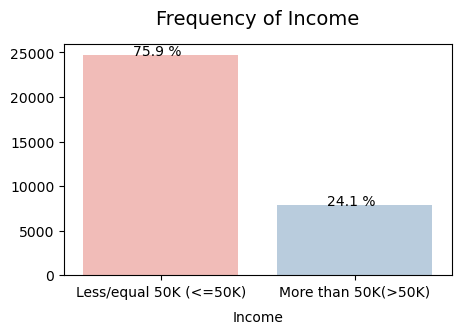

In [31]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of Income
col = 'Income'
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1), ['Less/equal 50K (<=50K)', 'More than 50K(>50K)'], size=10)
plt.title(f"Frequency of {col}", size=14, y=1.05);

24697 (75.9%) records as "<=50K" and 7839 (24.1%) records as ">50K" of the total dataset. The target variable is imbalanced.

### 1.6.1.2 Categorical columns

In [32]:
# List of categorical columns in the dataset
for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}")

1.Workclass
2.Education
3.Marital_status
4.Occupation
5.Relationship
6.Race
7.Sex
8.Native_country


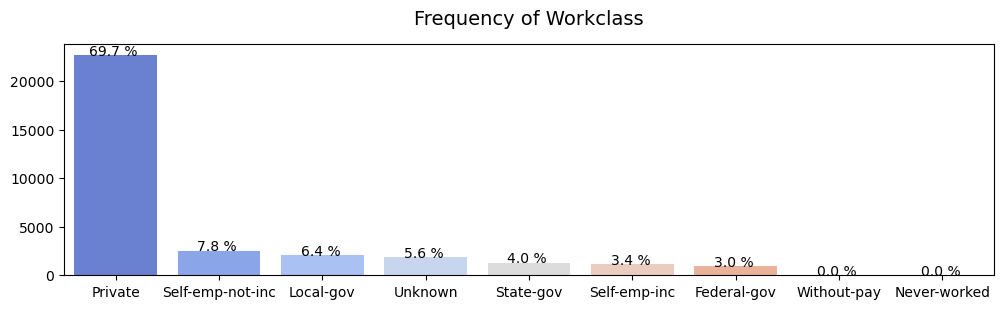

In [33]:
# Visualize the frequency of Workclass(1)
col = 'Workclass'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='coolwarm', order=df_counts.index.categories.to_list())
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

In [34]:
df[col].value_counts().to_frame().T

Workclass  Private  Self-emp-not-inc  Local-gov  Unknown  State-gov  \
count        22673              2540       2093     1836       1297   

Workclass  Self-emp-inc  Federal-gov  Without-pay  Never-worked  
count              1116          960           14             7

Private: The most common work class, accounting for 69.7% of the records.

Self-emp-not-inc: Represents 7.8% of the dataset.

Local-gov: Comprises 6.4% of the records.

Other work classes (such as “Unknown,” “State-gov,” “Federal-gov,” “Without-pay,” and “Never-worked”) have smaller percentages.

Text(0.5, 1.05, 'Frequency of Education')

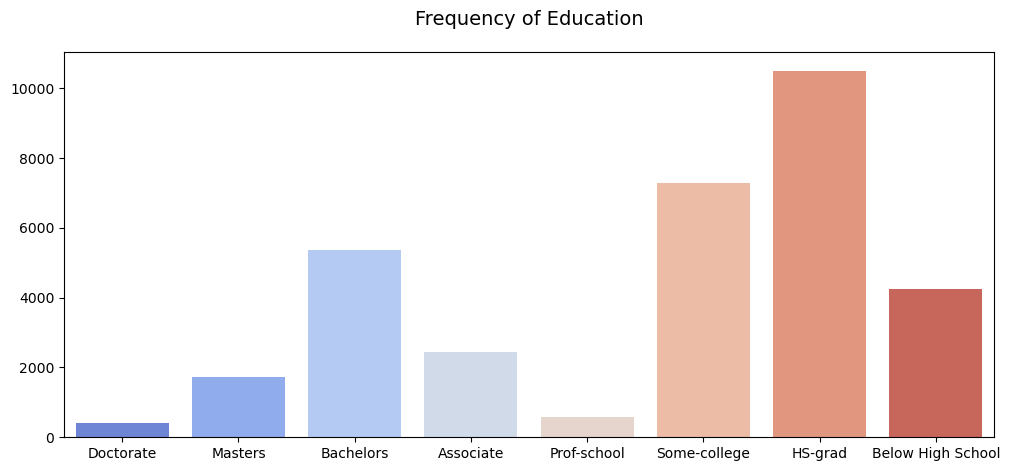

In [35]:
# Visualize the frequency of Education(2)
col = 'Education'
plt.figure(figsize=(12, 5))
df_counts = df[col].value_counts()
ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='coolwarm', order=df_counts.index.categories.to_list())

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

In [36]:
df_counts.to_frame()

count
Education               
HS-grad            10494
Some-college        7282
Bachelors           5352
Below High School   4248
Associate           2449
Masters             1722
Prof-school          576
Doctorate            413

Most of them have a High school graduate level of education, followed by Some college and Bachelors

Text(0.5, 1.05, 'Frequency of Marital_status')

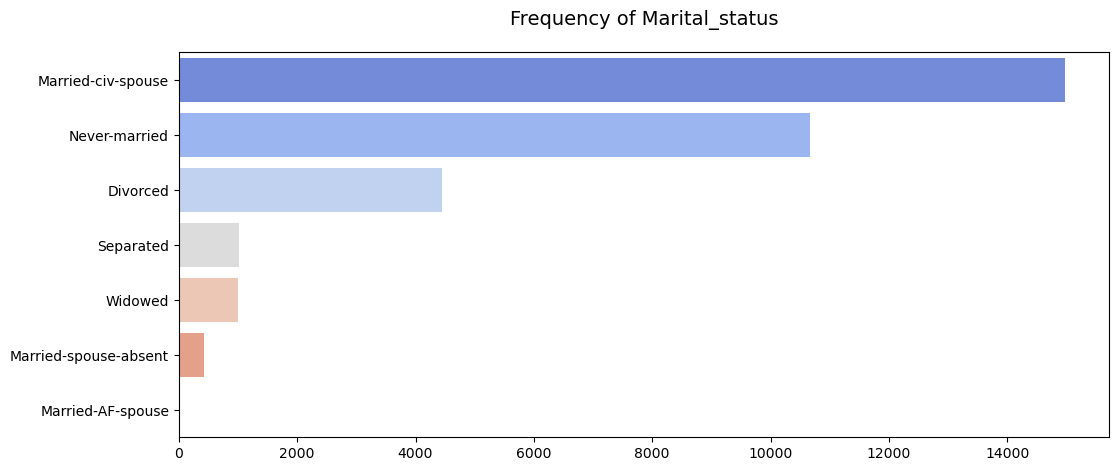

In [37]:
# Visualize the frequency of Marital_status(3)
col = 'Marital_status'
plt.figure(figsize=(12, 5))
df_sorted = df[col].value_counts()
ax = sns.barplot(y=df_sorted.index, x=df_sorted.values, palette='coolwarm')


plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

In [38]:
df_sorted.to_frame()

count
Marital_status              
Married-civ-spouse     14970
Never-married          10666
Divorced                4441
Separated               1025
Widowed                  993
Married-spouse-absent    418
Married-AF-spouse         23

Most of them are married to a civilian spouse,followed by Never-married

Text(0.5, 1.05, 'Frequency of Occupation')

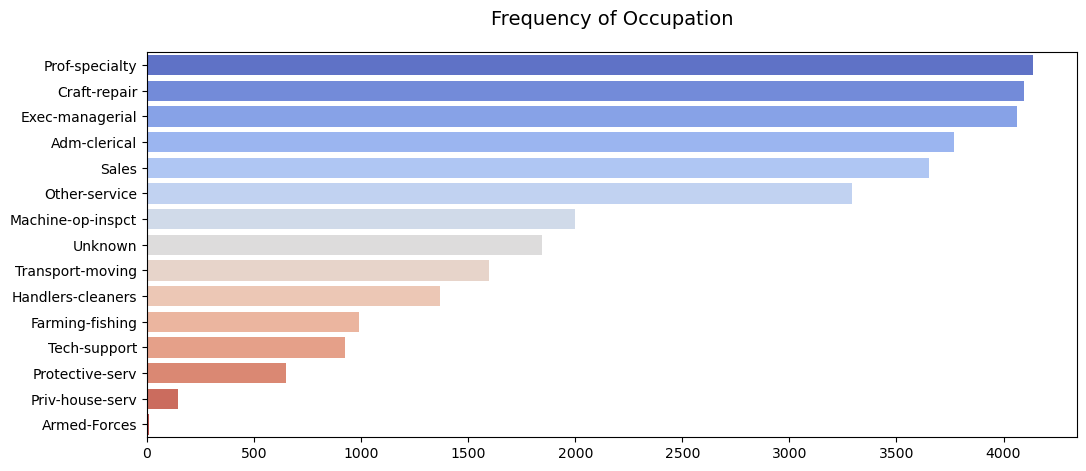

In [39]:
# Visualize the frequency of Occupation(4)
col = 'Occupation'
plt.figure(figsize=(12, 5))
df_sorted = df[col].value_counts()
ax = sns.barplot(y=df_sorted.index, x=df_sorted.values, palette='coolwarm')

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

In [40]:
df_sorted.to_frame()

count
Occupation              
Prof-specialty      4136
Craft-repair        4094
Exec-managerial     4065
Adm-clerical        3767
Sales               3650
Other-service       3291
Machine-op-inspct   2000
Unknown             1843
Transport-moving    1597
Handlers-cleaners   1369
Farming-fishing      992
Tech-support         927
Protective-serv      649
Priv-house-serv      147
Armed-Forces           9

The top 5 occupations are as follows in order:

1.Professional specialist.

2.Craft repair.

3.Executive Manager.

4.Administrative Clerks.

5.Sales.

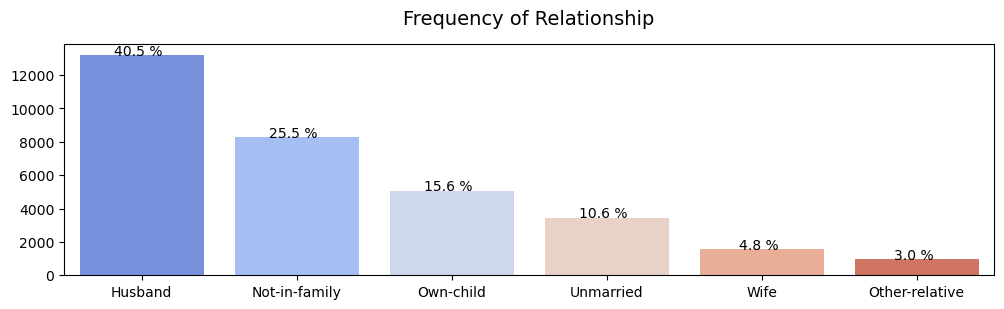

In [41]:
# Visualize the frequency of Relationship(5)
col = 'Relationship'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

In [42]:
# Display the counts and % of each category
df[col].value_counts().to_frame().T

Relationship  Husband  Not-in-family  Own-child  Unmarried  Wife  \
count           13187           8291       5064       3445  1568   

Relationship  Other-relative  
count                    981

40.5% are a Husband, 25.5% not-in-family, 15.6% own-child, 10.6% unmarried, 4.8% wife, and 3% other-relative.

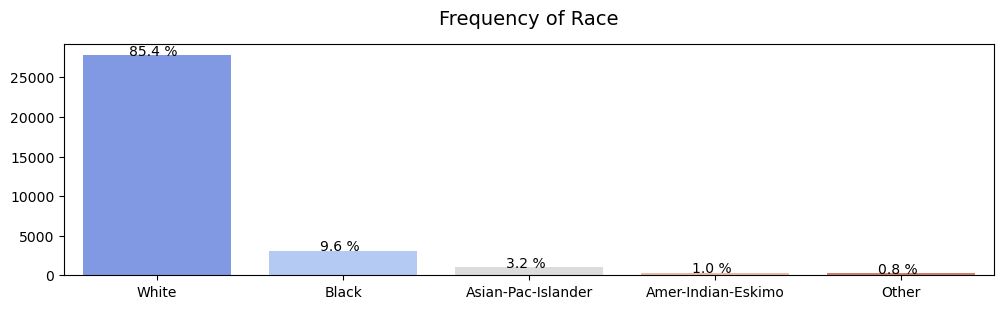

In [43]:
# Visualize the frequency of Race(6)
col = 'Race'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

In [44]:
# Display the counts and % of each category
df[col].value_counts().to_frame().T

Race   White  Black  Asian-Pac-Islander  Amer-Indian-Eskimo  Other
count  27794   3122                1038                 311    271

 85.4% of the observations correspond to white, followed by 9.6% black race, 3.2% Asian-Pac-Islander, 1% Amer-Indian-Eskimo, and 0.8% other.

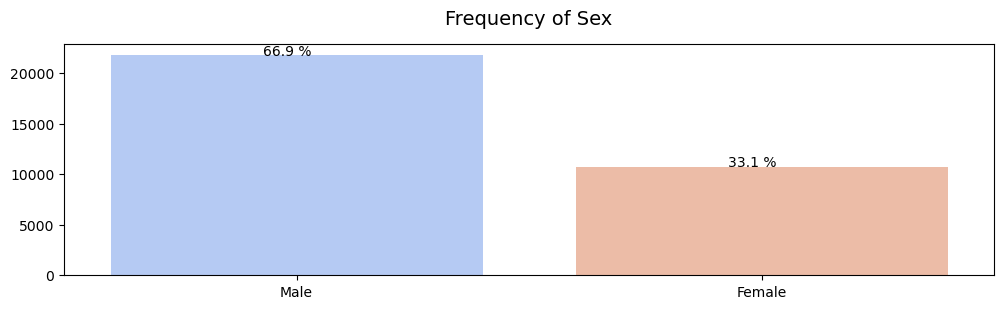

In [45]:
# Visualize the frequency of Sex(7)
col = 'Sex'
plt.figure(figsize=(12, 3))
ax = sns.countplot(x=col, data=df, palette='coolwarm')
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

In [46]:
# Display the counts and % of each category
df[col].value_counts().to_frame().T

Sex     Male  Female
count  21774   10762

66.9% of observations correspond to Male, and the rest 33.1% to female.

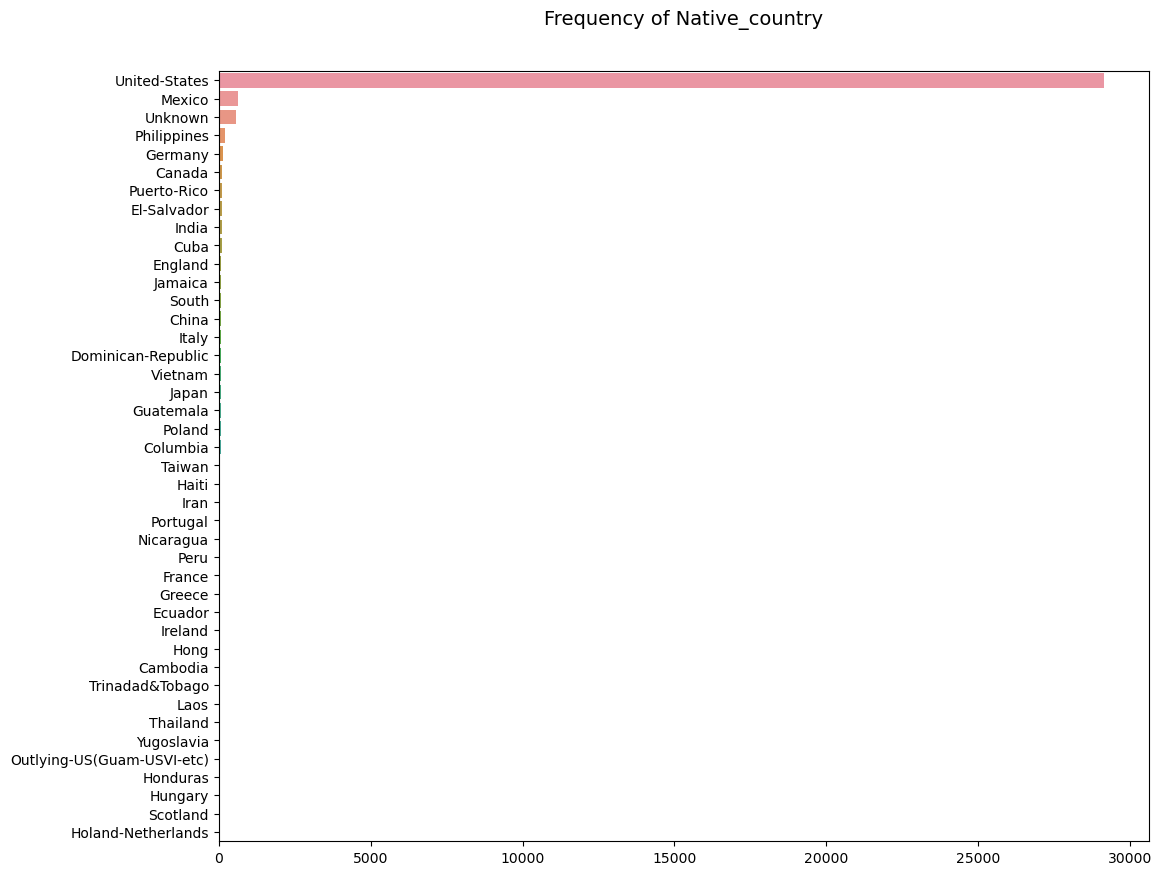

In [47]:
# Visualize the frequency of Native_country(8)
col = 'Native_country'
plt.figure(figsize=(12, 10))
df_sorted = df[col].value_counts()
ax = sns.barplot(y=df_sorted.index, x=df_sorted.values)

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

In [48]:
df_sorted.to_frame().T

Native_country  United-States  Mexico  Unknown  Philippines  Germany  Canada  \
count                   29152     639      582          198      137     121   

Native_country  Puerto-Rico  El-Salvador  India  Cuba  ...  Trinadad&Tobago  \
count                   114          106    100    95  ...               19   

Native_country  Cambodia  Laos  Thailand  Yugoslavia  \
count                 19    18        18          16   

Native_country  Outlying-US(Guam-USVI-etc)  Honduras  Hungary  Scotland  \
count                                   14        13       13        12   

Native_country  Holand-Netherlands  
count                            1  

[1 rows x 42 columns]

The top 5 Native countries are as follows in order:

1.United States.(Almost 90% correspond to the United States.)

2.Mexico.

3.Unknown.

4.Philippines.

5.Germany


### 1.6.1.3 Numerical columns

In [49]:
# List of numerical columns
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. Age
2. Fnlwgt
3. Education_num
4. Capital_gain
5. Capital_loss
6. Hours_per_week


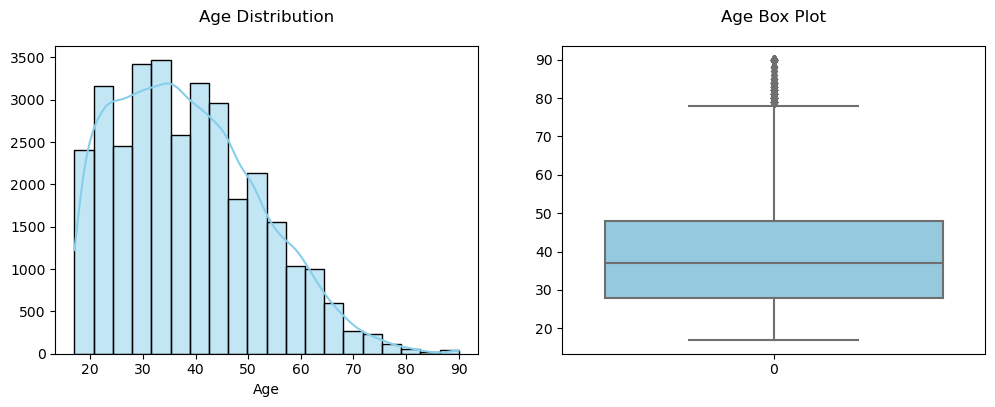

Skewness of Age : 0.557657407634356


In [50]:
#Visualize (1) Age distribution
col = 'Age'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Age
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Age is skewed to the right. There are outliers present in the Box plot.

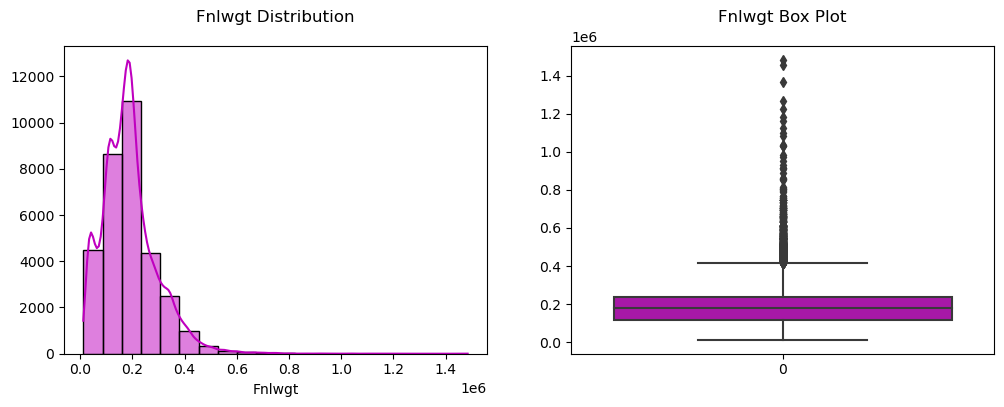

Skewness of Fnlwgt : 1.447695071063747


In [51]:
#Visualize (2) Fnlwgt distribution
col = 'Fnlwgt'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df[col], ax=axes[1], color='m')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Fnlwgt is skewed to the right. There are outliers present in the Box plot.

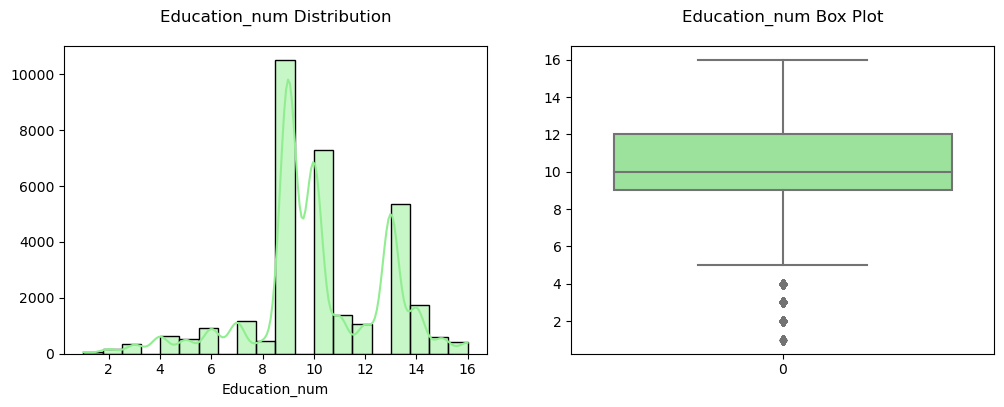

Skewness of Education_num : -0.30945415628220213


In [52]:
#Visualize (3) Education_num distribution
col = 'Education_num'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df[col], ax=axes[1], color='lightgreen')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Education_num
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Education_num is skewed to the left. There are outliers present in the Box plot. This feature despite being numerical, would be interesting to analyze as a categorical feature.

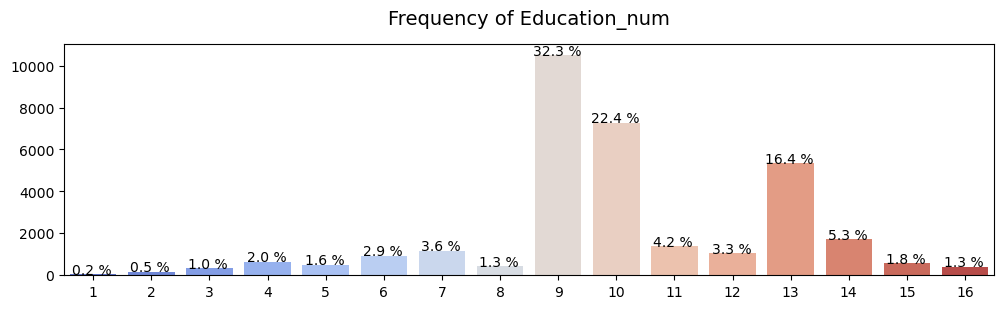

In [53]:
 #Visualize the frequency of Education_num (3)
col = 'Education_num'
plt.figure(figsize=(12, 3))
df_sorted = df[col].value_counts()
ax = sns.barplot(x=df_sorted.index, y=df_sorted.values, palette='coolwarm')
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)
plt.show()

The majority of the observations correspond to who has 9 to 14 years of education.

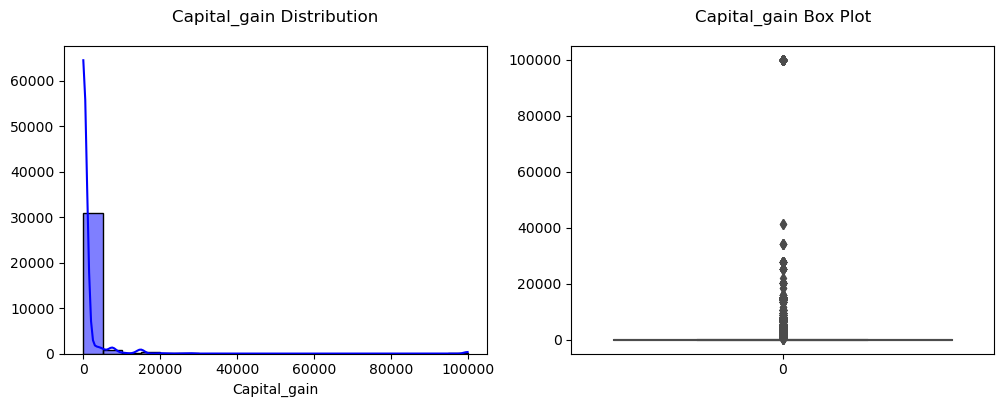

Skewness of Capital_gain : 11.949244909052934


In [54]:
#Visualize (4) Capital_gain distribution
col = 'Capital_gain'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='b')
sns.boxplot(df[col], ax=axes[1], color='b')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Capital_gain
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Capital_gain is skewed to the right. There are outliers present in the Box plot.

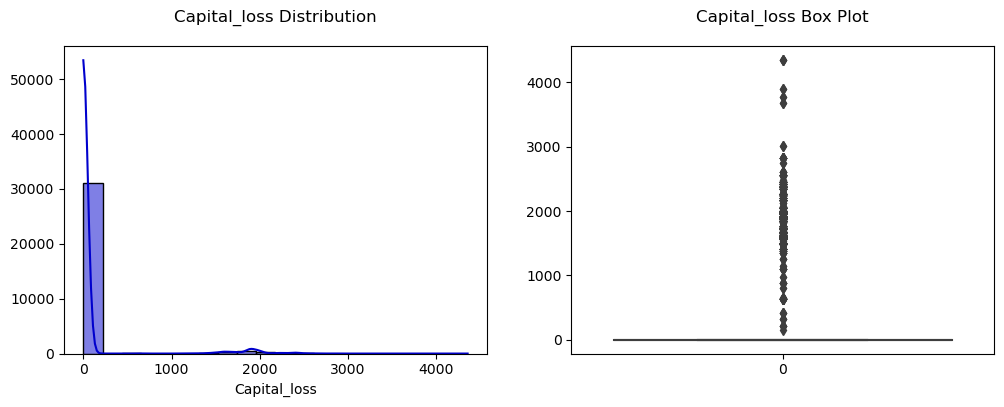

Skewness of Capital_loss : 4.592622126751731


In [55]:
#Visualize (5) Capital_loss distribution
col = 'Capital_loss'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='mediumblue')
sns.boxplot(df[col], ax=axes[1], color='mediumblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Capital_loss
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Capital_loss is skewed to the right. There are outliers present in the Box plot.

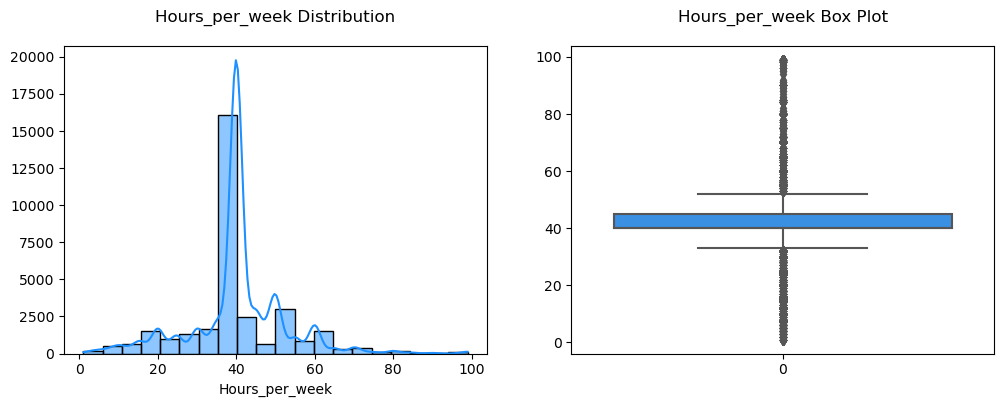

Skewness of Hours_per_week : 0.2287520890962958


In [56]:
#Visualize (6) Hours_per_week distribution
col = 'Hours_per_week'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='dodgerblue')
sns.boxplot(df[col], ax=axes[1], color='dodgerblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Hours_per_week
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Hours_per_week seems almost normal. There are outliers present in the Box plot.

### 1.6.1.5 Univariate Boxplot

In [57]:
numerical_col

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

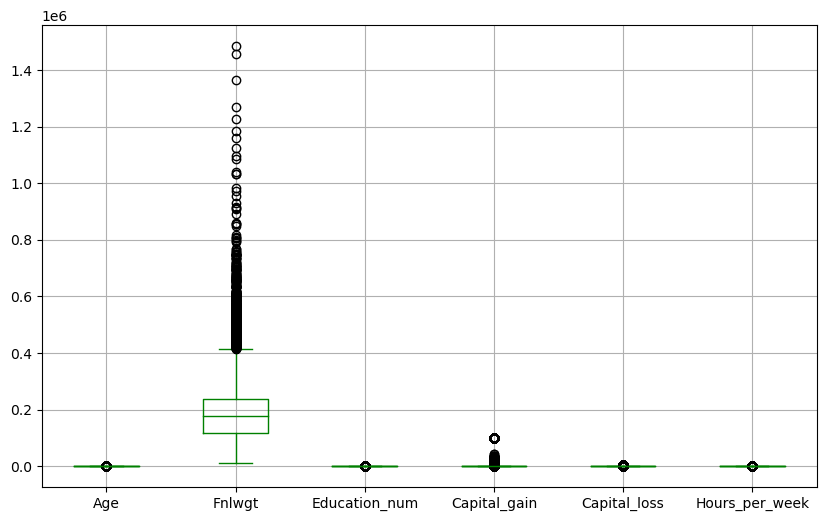

In [58]:
# Draw a boxplot for numerical variables
plt.figure(figsize=(10, 6))
df.boxplot(column=numerical_col, figsize=(10,10), color='green');

All numerical columns presents outliers. The data is in different scales.

# 1.6.2 Bivariate Analysis

### 1.6.2.1 BoxPlot Analysis: Summary of the distribution according to Income

In [59]:
# List of numerical columns
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. Age
2. Fnlwgt
3. Education_num
4. Capital_gain
5. Capital_loss
6. Hours_per_week


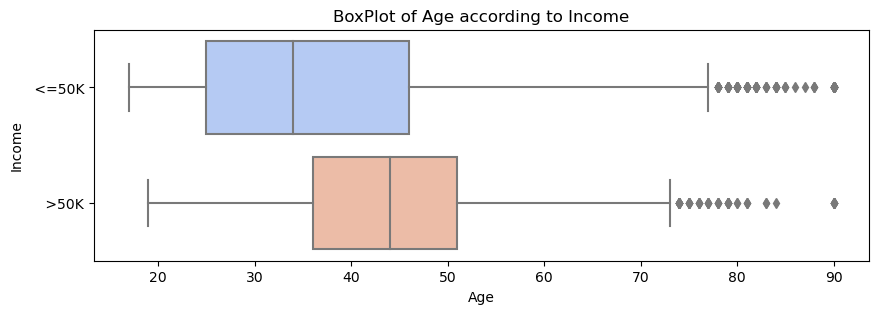

In [60]:
# Visualizing and comparing each independent variable with target
# Columns 1. Age 
col = 'Age'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

Those with an income of more than >50k tend to be between 36 and 51 years old, and those with less income tend to be between 24 an 45 years old. There are outliers both for those with an income >50k and for those with a lower income. Seems like age has an influence on the target variable.

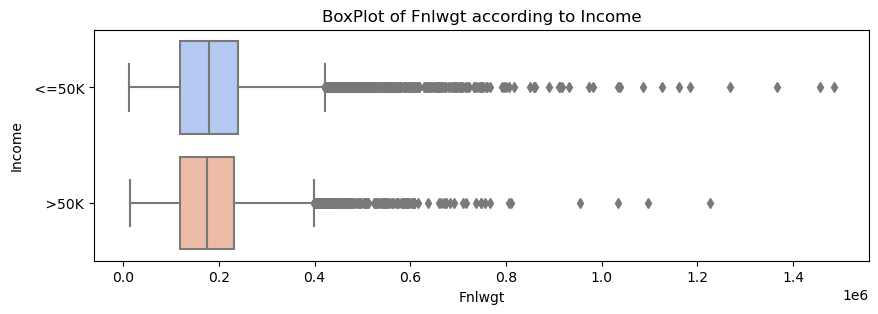

In [61]:
# Visualizing and comparing each independent variable with target
# Columns 2. Fnlwgt 
col = 'Fnlwgt'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

The final weight (Fnlwgt) seems to behave similarly for those who have a >50 income as those who have a lower income. However, the group with an income <=50K presents more outliers. This feature seems to have no significant impact on the target variable.

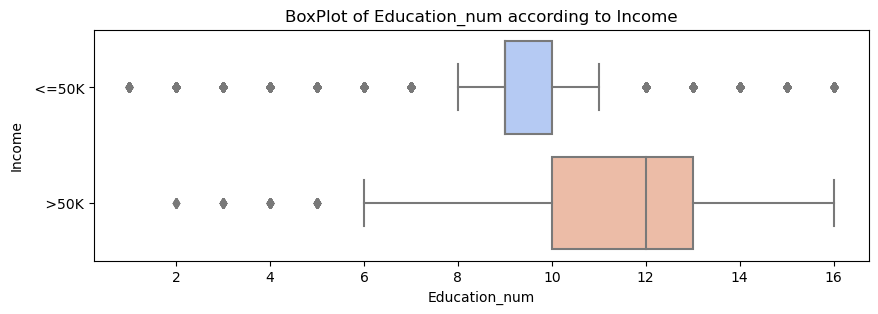

In [62]:
# Visualizing and comparing each independent variable with target
# Columns 3. Education_num 
col = 'Education_num'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

It Seems like the Education number has an impact on those who have a >50K income since those who have 10 years of education or more tend to perceive >50k as income.

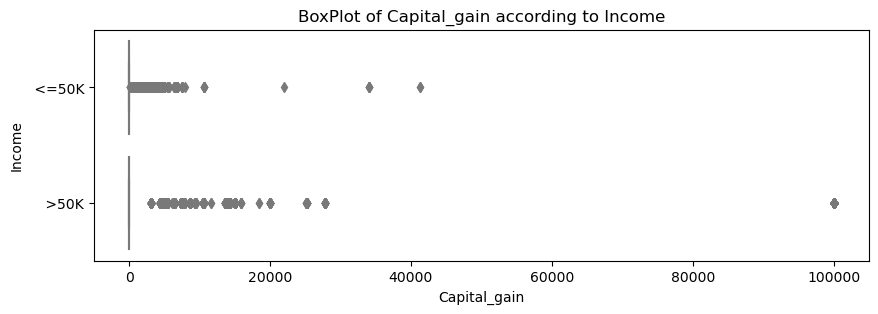

In [63]:
# Visualizing and comparing each independent variable with target
# Columns 4. Capital_gain 
col = 'Capital_gain'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

The majority of observations of Capital gain are zeros. The other observations are shown as outliers.

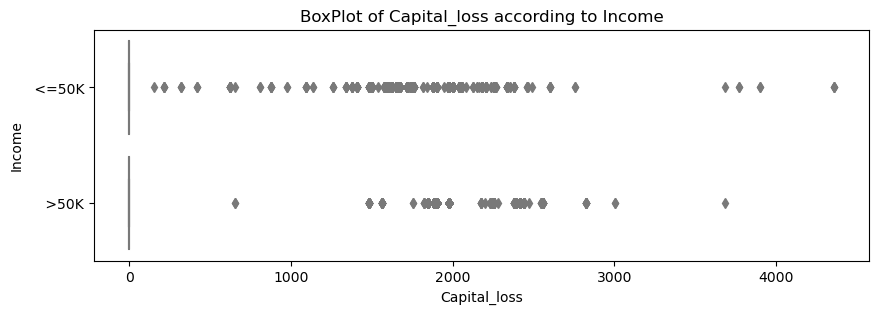

In [64]:
# Visualizing and comparing each independent variable with target
# Columns 5. Capital_loss 
col = 'Capital_loss'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

The majority of observations of Capital loss are zeros. The other observations are shown as out

### Further Analysis for Capital_gain and Capital_loss

In [65]:
# Filter the non-zero observations for Capital_gain/Capital_loss
df_capital = df[(df['Capital_gain'] > 0) | (df['Capital_loss'] > 0) ]
print(f"The non-zero observations represent {df_capital.shape[0]/df.shape[0] * 100:.2f}%.")
print(f"The dataframe dimensions with non-zero observations in Capital_gain and Capital_loss is {df_capital.shape}")

The non-zero observations represent 13.00%.
The dataframe dimensions with non-zero observations in Capital_gain and Capital_loss is (4230, 16)


We will plot the boxplot for the sample with values in Capital gain and Capital loss in order to have a better view of the impact of these data on the target variable.

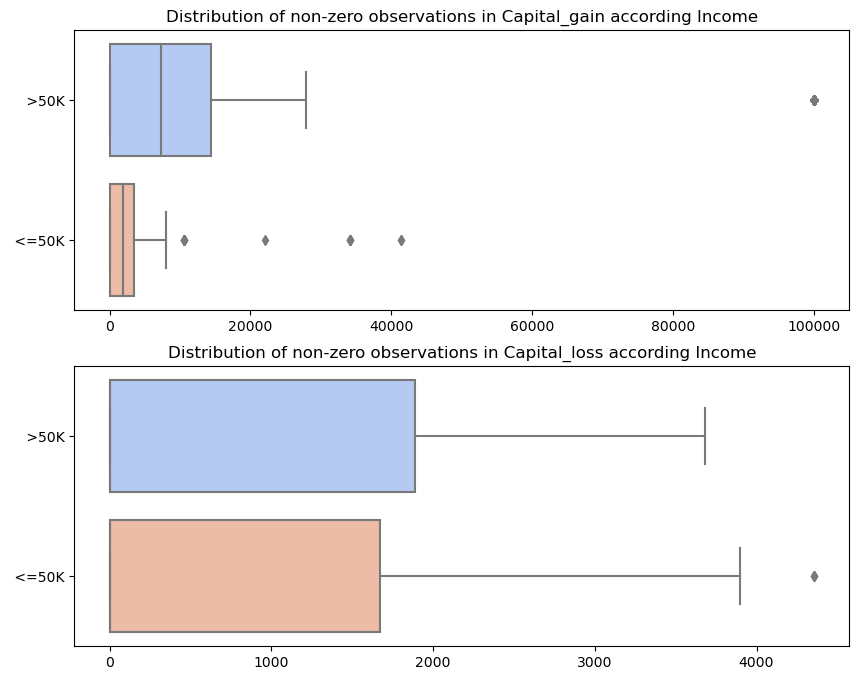

In [66]:
# Box-plot comparing the non-zero observation in Capital gain and Capital loss according to Income
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

col = 'Capital_gain'
sns.boxplot(data=df_capital[[col,'Income']], x=col, y='Income', palette='coolwarm', ax=axes[0])
axes[0].set_title(f"Distribution of non-zero observations in {col} according Income", size=12, y=1);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)

col = 'Capital_loss'
sns.boxplot(data=df_capital[[col,'Income']], x=col, y='Income', palette='coolwarm', ax=axes[1])
axes[1].set_title(f"Distribution of non-zero observations in {col} according Income", size=12, y=1);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].set_xlabel('', size=10, labelpad=8)

plt.show()

In the above plot, we can notice the impact of the non-zero values for Capital_gain/Capital_loss in the target variable. Those who have an income >50K had a capital gain more than those who have an income <=50K as we can see in the upper boxplot. On the other hand, those who have an income >50K had a capital loss slightly higher than those who have a lower income(<=50K)

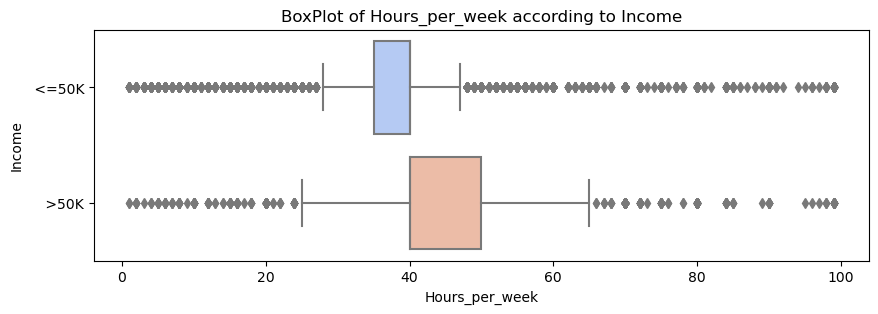

In [67]:
# Visualizing and comparing each independent variable with target
# Columns 6 Hours_per_week 
col = 'Hours_per_week'
plt.figure(figsize=(10, 3))
sns.boxplot(data=df[[col,'Income']], x=col, y='Income', palette='coolwarm')
plt.title(f"BoxPlot of {col} according to Income")
    
plt.show()

Those who work 40 hours per week or more tend to have an income >50K. The majority of those who have an income <=50K tend to work less than 40 hours per week.

### 1.6.2.2 Relation between target variable and categorical columns

In [68]:
# List of categorical columns in the dataset
for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}")

1.Workclass
2.Education
3.Marital_status
4.Occupation
5.Relationship
6.Race
7.Sex
8.Native_country


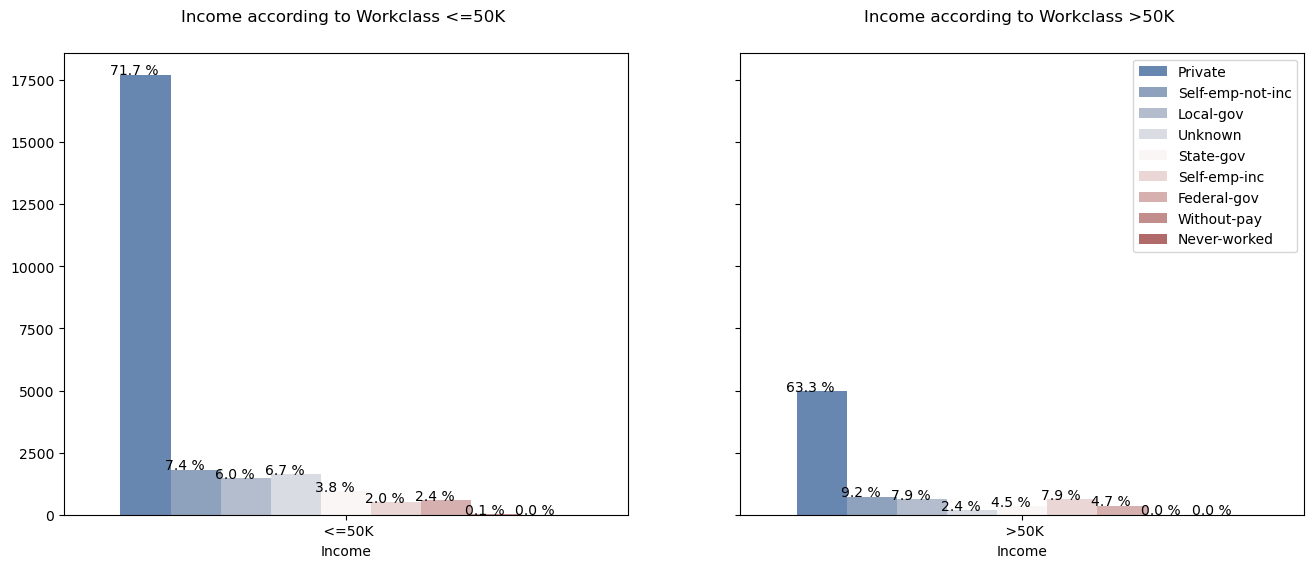

In [69]:
# Compare Workclass vs Income
col = 'Workclass' #1

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

The majority of those who have an income >50K belong to private workclass with 63.3%. However, it is important to mention that those who have a lower income also mainly belong to private work classes, 71.7%.

Therefore we can conclude that the majority of the observations belong to the private work class regardless of their income range.

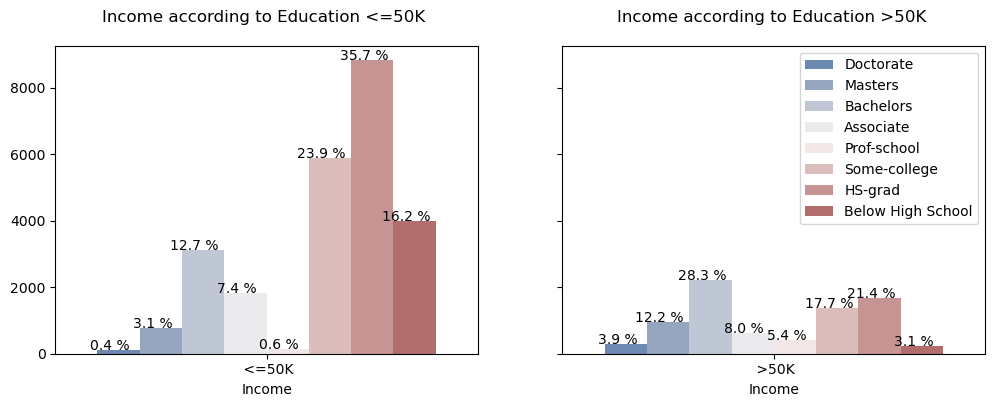

In [70]:
# Compare Education vs Income
col = 'Education' #2

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

Seems the Education feature has an influence on the income range since the majority of those who have an income >50K have a Bachelor's degree, 28.3% specifically. While those with a lower income <=50K 35.7% are high school graduates, 23.9% have some college years of studies, and 16.2% haven't finished high school yet.

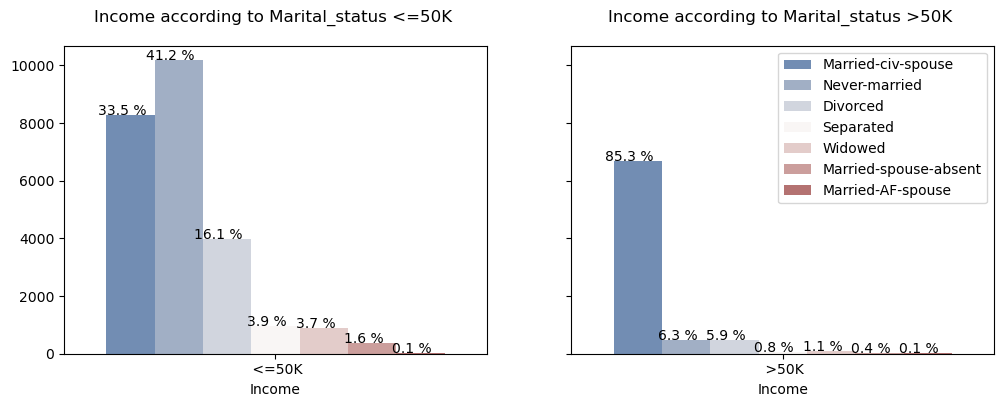

In [71]:
# Compare Marital_status vs Income
col = 'Marital_status' #3

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

The majority of those who have an income >50K are married to a civilian spouse 85.3% while the other marital statuses have a minimal presence 6.3% or less.

In contrast, those who have an income less than <=50K mostly never had been married 41.2%, followed by 33.5% who are married to a civilian spouse, 16.1% divorced, and the rest 9.2% correspond to other marital statuses.

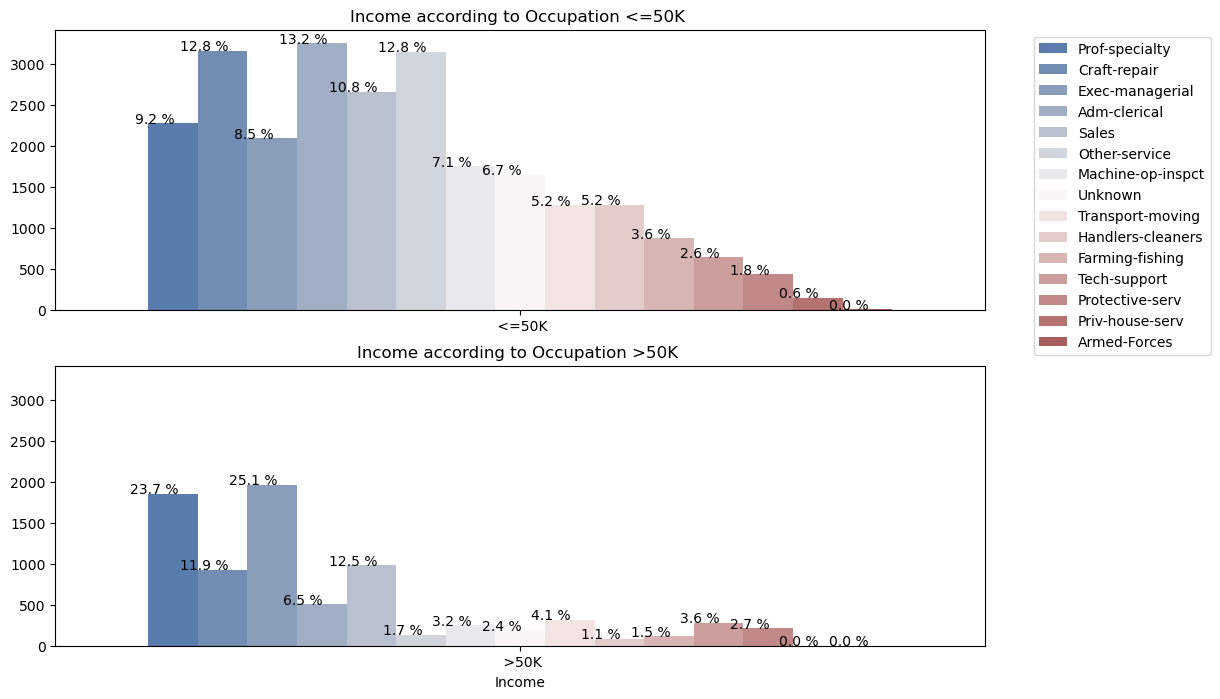

In [72]:
# Compare Occupation vs Income
col = 'Occupation' #4

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)
axes[0].legend(loc='upper right', bbox_to_anchor=(1.25, 1))

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend().remove()

plt.show()

According to the above plot, the more representative occupations for the group who have an >50K income are: 25.1% Exec-managerial, 23.7% Prof-specialty, 12.5% Sales, 11.9% Craft-repair, and 6.5% Adm-clerical. The other occupations have less than 4.2% representation.

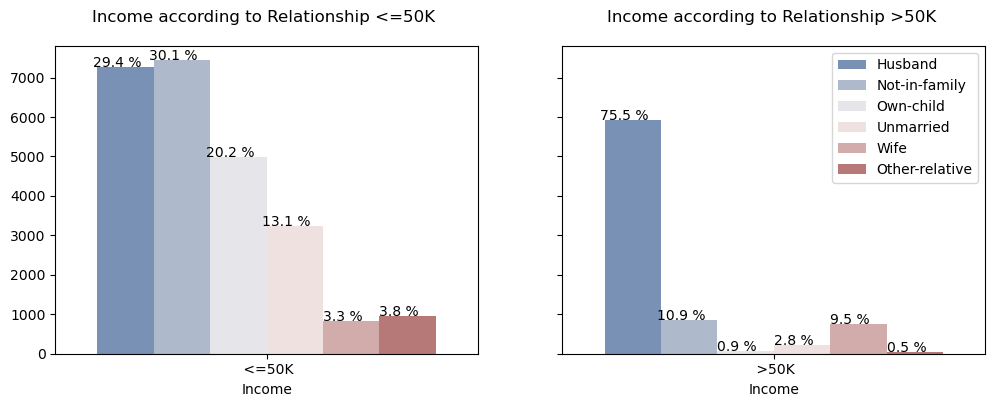

In [73]:
# Compare Relationship vs Income
col = 'Relationship' #5

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

95.9% of those who have a >50K income are represented by 75.5% husbands, 10.9% not-in-family, and 9.5% wives. On the other hand, the most representative groups for those who have a lower income <=50K are 30.1% not-in-family, 29.4% husbands, 20.2% own-child, and 13.1% unmarried, 92.8% in total.

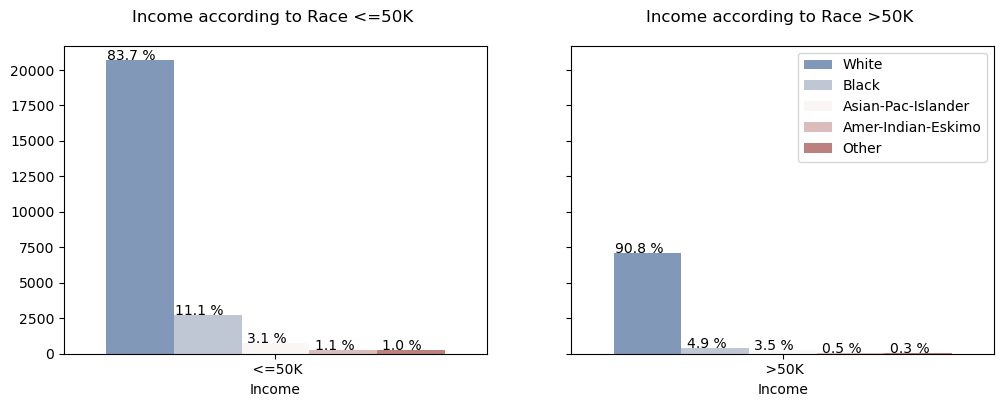

In [74]:
# Compare Race vs Income
col = 'Race' #6

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

The most representative group in both groups, >50k and <=50K income, is the white race.

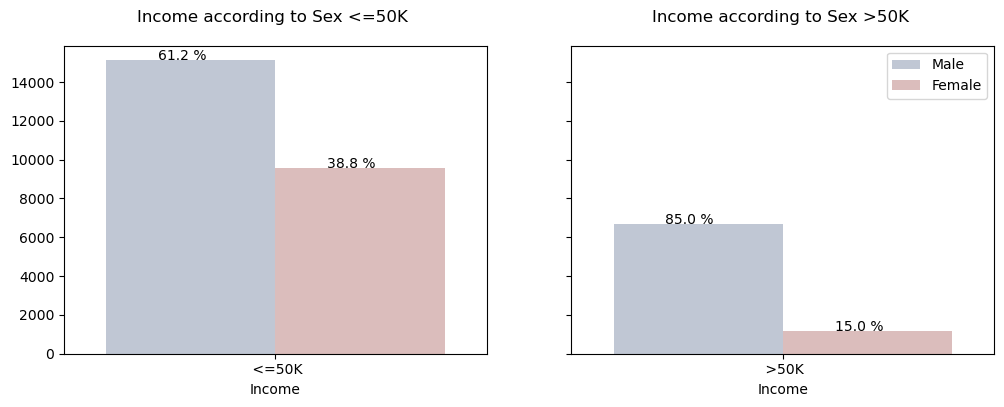

In [75]:
# Compare Sex vs Income
col = 'Sex' #7

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1.05);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].legend().remove()

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1.05);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend(loc='upper right')

plt.show()

The ratio for those with an income of 50K or more is 85% males and 15% females. For the group with a lower income, the ratio is 61.2% males to 38.8% females. This implies that there are approximately 24% more males with >50K income.

In [76]:
# Function to format labels and specify the position for the percentages
def format_label_nc(pct):
    if (pct <= 2) & (pct > 1):   
        return f"\n{pct:.1f}%"
    return f"{pct:.1f}%"

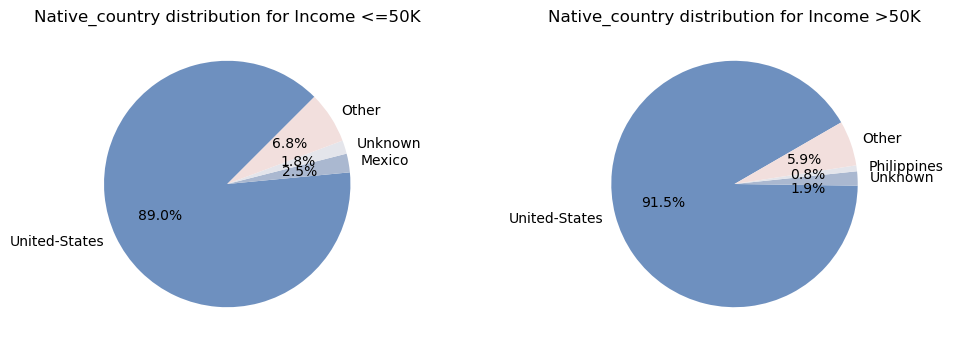

In [77]:
# Distribution of Native_country according to Income
col = 'Native_country' #8

sns.set_palette('vlag')

# Filter the data for the two income categories
df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

# Calculate the counts for each 'Marital_status' category in each income group
counts_less_50K = df_less_50K[col].value_counts()
counts_more_50K = df_more_50K[col].value_counts()

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Select 3 top categories for 'Income <=50K'
top_categories = counts_less_50K.nlargest(3)
labels = top_categories.index.to_list()
labels.append('Other')
data = top_categories.to_list()
data.append(counts_less_50K.sum() - top_categories.sum())

# Plot pie chart for 'Income <=50K'
axes[0].pie(data, labels=labels, autopct='%1.1f%%', startangle=45)
axes[0].set_title(f"{col} distribution for Income <=50K")

# Select 3 top categories for 'Income >50K'
top_categories = counts_more_50K.nlargest(3)
labels = top_categories.index.to_list()
labels.append('Other')
data = top_categories.to_list()
data.append(counts_more_50K.sum() - top_categories.sum())

# Plot pie chart for 'Income >50K'
axes[1].pie(data, labels=labels,  autopct=format_label_nc, startangle=30)
axes[1].set_title(f"{col} distribution for Income >50K")

plt.show()

The majority of the samples correspond to the United States, so in both the group with income >50K and the group with income <=50K this is the most representative group. However, from the above plot, we can see that for the group of those who earn >50K the second most representative group would be the Philippines with 0.8%, leaving aside the 1.9% that corresponds to missing data. In contrast, the second most representative group for those who have an income <=50K is Mexico with 2.5%.

### 1.6.2.3 Relation between target variable and Numerical columns analyzed as categories

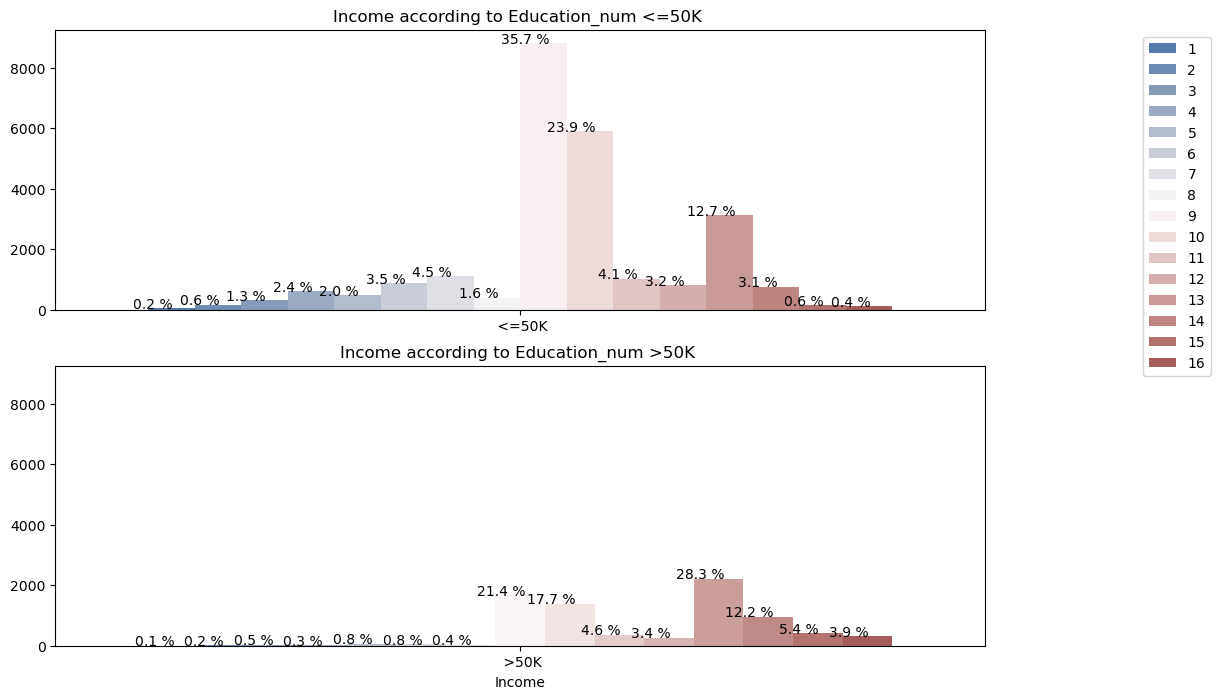

In [78]:
# Compare Education_num vs Income
col = 'Education_num' 

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharey=True)

df_less_50K = df[df['Income'] == ' <=50K']
df_more_50K = df[df['Income'] == ' >50K']

sns.countplot(x='Income', hue=col, data=df_less_50K, palette='vlag', ax=axes[0])
show_percentage(axes[0], len(df_less_50K)) 
axes[0].set_title(f"Income according to {col} <=50K ", size=12, y=1);
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)
axes[0].legend(loc='upper right', bbox_to_anchor=(1.25, 1))

sns.countplot(x='Income', hue=col, data=df_more_50K, palette='vlag', ax=axes[1])
show_percentage(axes[1], len(df_more_50K)) 
axes[1].set_title(f"Income according to {col} >50K ", size=12, y=1);
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend().remove()

plt.show()

From the above plot, we observe that those who have a >50k income tend to have more than 9 years of education.

### 1.6.2.4 Relation between Age and Fnlwgt

Since the Fnlwgt(The weights on the Current Population Survey CPS) are related to race, age, and sex according to the description of the present project we will analyze the relation between these features.

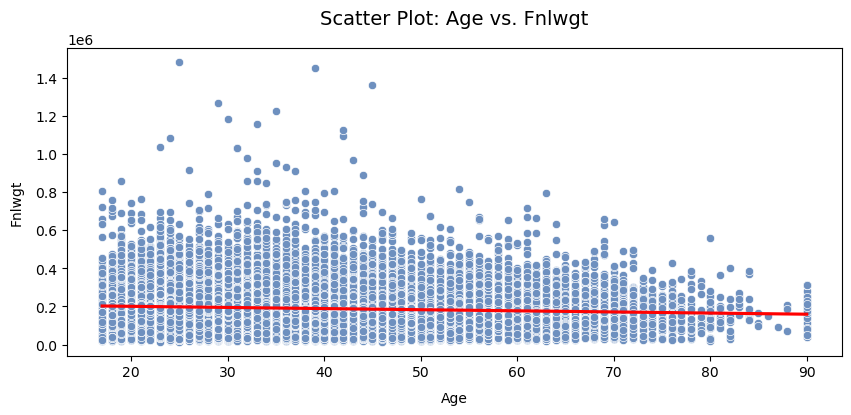

In [79]:
plt.figure(figsize=(10, 4))
col1 = 'Age'
col2 = 'Fnlwgt'
ax = sns.scatterplot(x=col1, y= col2, data=df)
sns.regplot(x=col1, y=col2, data=df, scatter=False, ax=ax, color='r')

plt.xlabel(col1, size=10, labelpad=8)
plt.ylabel(col2, size=10, labelpad=8)
plt.title(f'Scatter Plot: {col1} vs. {col2}', size=14, y=1.05);

Seems there is no clear relation between Age and Fnlwgt.

### 1.6.2.5 Distribution of Fnlwgt according to Race and Sex

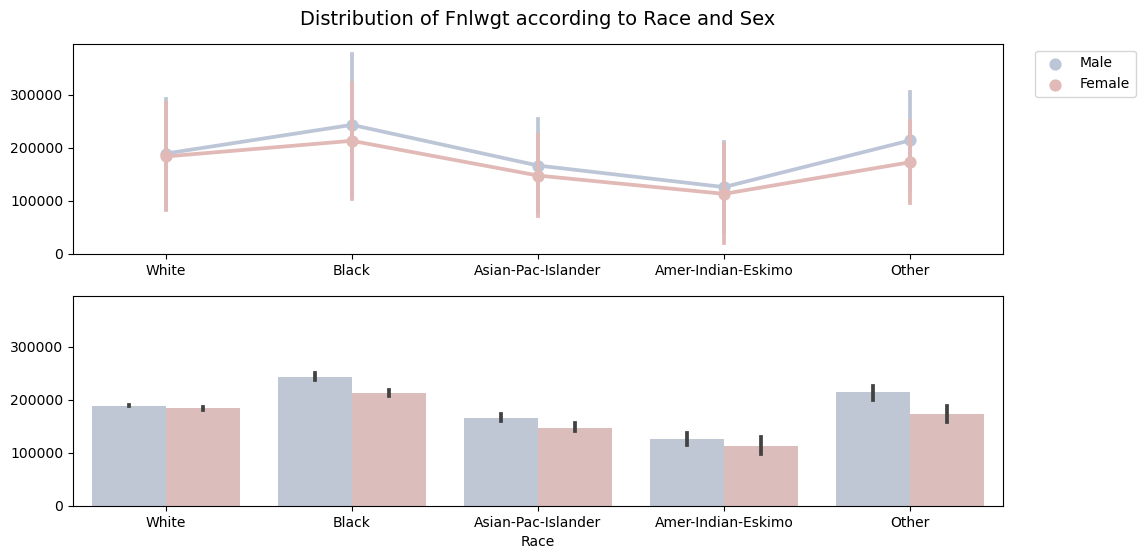

In [80]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharey=True)

col1 = 'Fnlwgt'
col2 = 'Race'
col3 = 'Sex'
# Comparing standar deviation with a pointplot
sns.pointplot(x=col2, y= col1, hue=col3, data=df, ci='sd', palette='vlag', ax=axes[0])
# Comparing the mean
sns.barplot(x=col2, y= col1, hue=col3, data=df, palette='vlag', ax=axes[1])

axes[0].set_title(f'Distribution of {col1} according to {col2} and {col3}', size=14, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].set_xlabel('', size=10, labelpad=8)
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1))
axes[1].set_ylabel('', size=10, labelpad=8)
axes[1].legend().remove();

Above we can see the distribution of Fnlwgh according to the race and sex category, with the standar deviation for each category as the error bars in the upper plot, and the mean in the down and the mean in the below plot. The black race has a high variability especially in the male group.

# 1.6.3 Multivariate Analysis

### 1.6.3.1 Pairplot

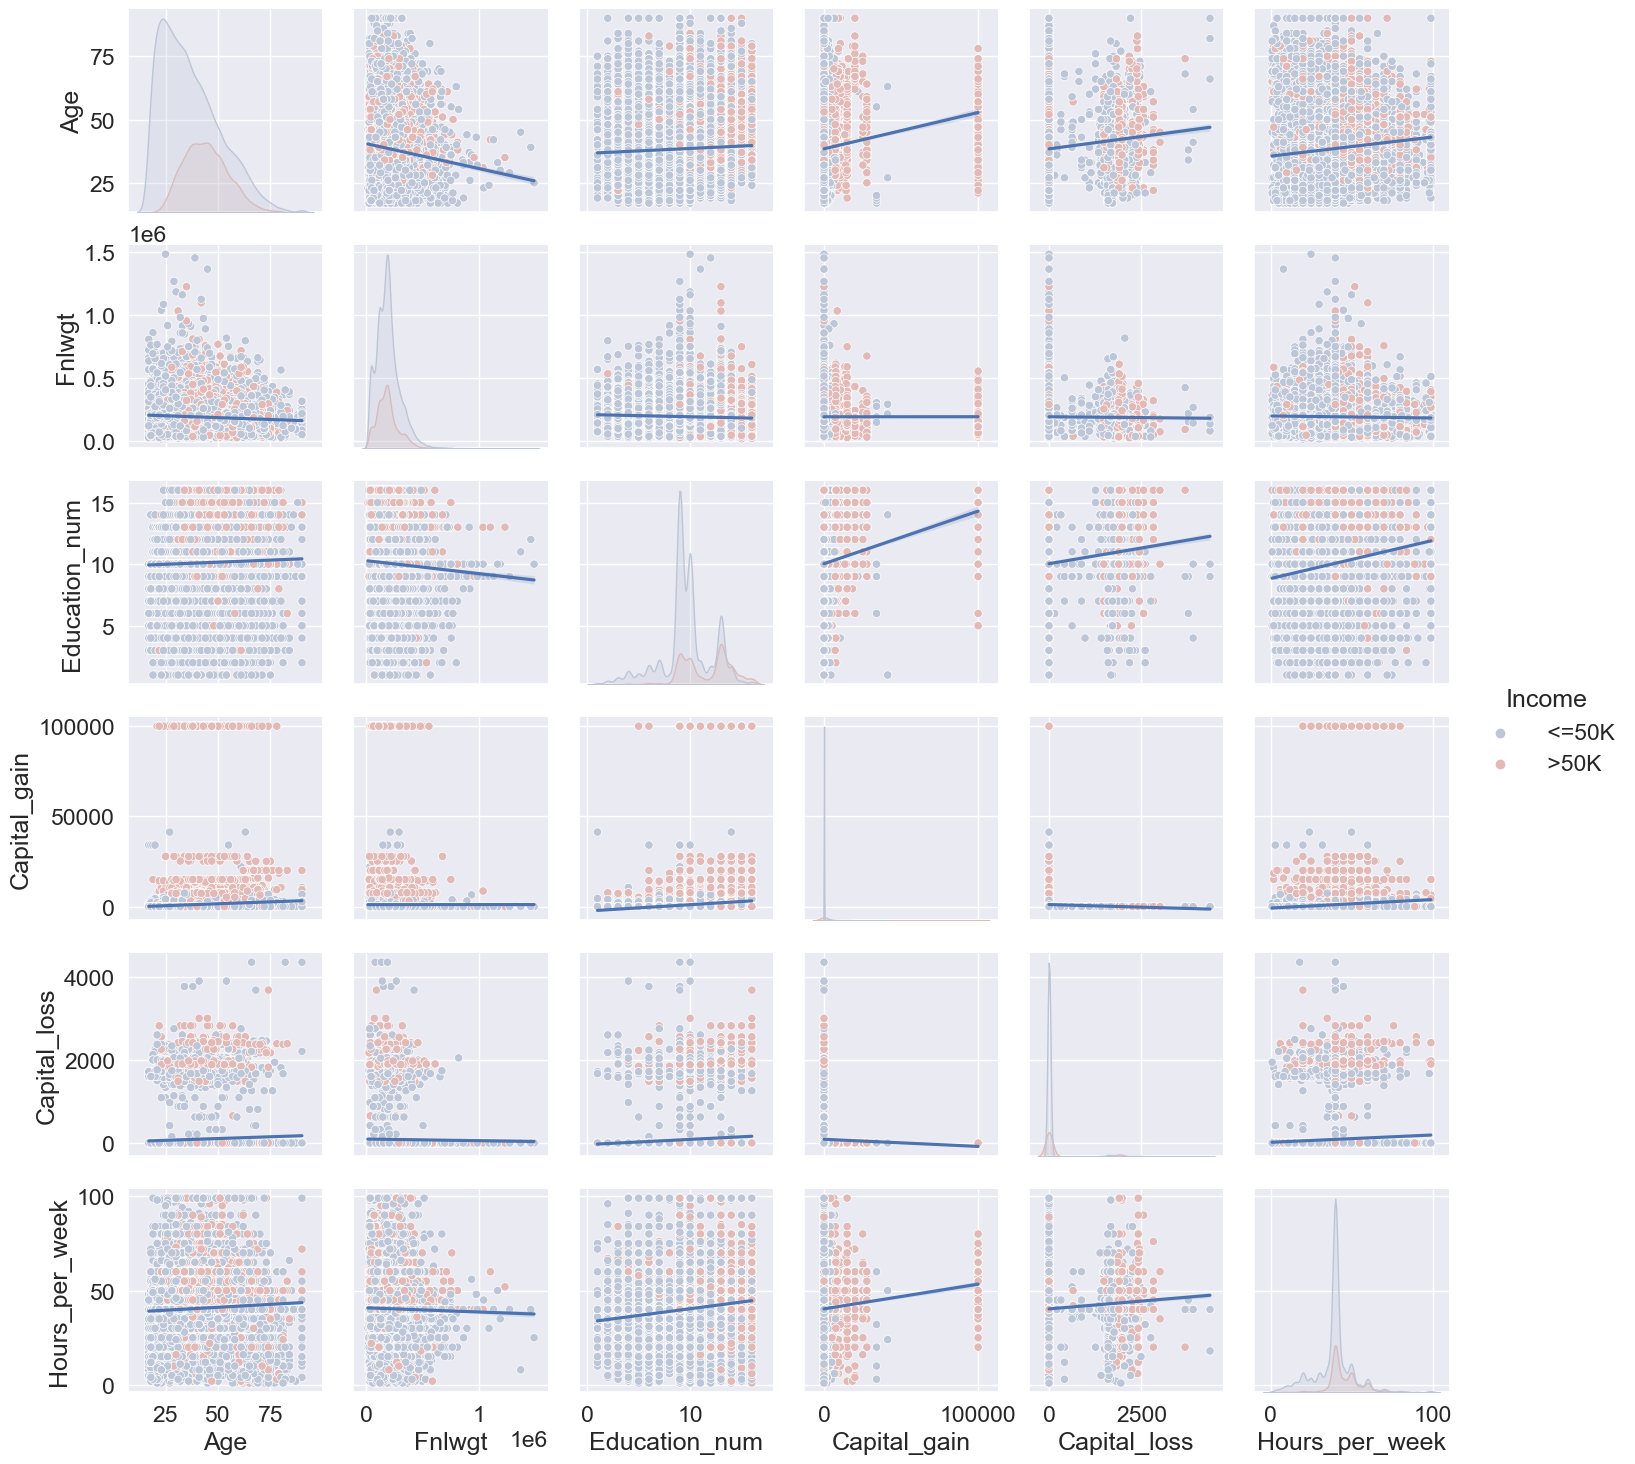

In [81]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, hue='Income', palette = "vlag")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

There is a positive correlation between Education_num, Capital_gain, and Hours_per_week.

### 1.6.3.2 Encoding the target variable

In [82]:
# Eliminating extra spaces 
df['Income'] = df['Income'].str.strip()

df['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [83]:
df['Income'] = df['Income'].map({'<=50K': 0, '>50K': 1})
df.head()

Age         Workclass  Fnlwgt          Education  Education_num  \
0   50  Self-emp-not-inc   83311          Bachelors             13   
1   38           Private  215646            HS-grad              9   
2   53           Private  234721  Below High School              7   
3   28           Private  338409          Bachelors             13   
4   37           Private  284582            Masters             14   

       Marital_status         Occupation   Relationship   Race     Sex  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

   Capital_gain  Capital_loss  Hours_per_week Native_country  Income  \
0             0             0              13  United-States       0   
1             0             0              40  United-States       0   
2             0             0              40  United-States       0   
3             0             0              40           Cuba       0   
4             0             0              40  United-States       0   

  Education_bk  
0    Bachelors  
1      HS-grad  
2         11th  
3    Bachelors  
4      Masters

Now the label is encoded having values 1 for >50K and 0 for <=50K.

### 1.6.3.2 Correlation between target variable and independent variables.

In [85]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
cor = numerical_df.corr()

# Display the correlation matrix
cor

Age    Fnlwgt  Education_num  Capital_gain  Capital_loss  \
Age             1.000000 -0.076448       0.036224      0.077676      0.057745   
Fnlwgt         -0.076448  1.000000      -0.043353      0.000433     -0.010267   
Education_num   0.036224 -0.043353       1.000000      0.122661      0.079901   
Capital_gain    0.077676  0.000433       0.122661      1.000000     -0.031638   
Capital_loss    0.057745 -0.010267       0.079901     -0.031638      1.000000   
Hours_per_week  0.068515 -0.018900       0.148426      0.078408      0.054229   
Income          0.234039 -0.009521       0.335299      0.223340      0.150498   

                Hours_per_week    Income  
Age                   0.068515  0.234039  
Fnlwgt               -0.018900 -0.009521  
Education_num         0.148426  0.335299  
Capital_gain          0.078408  0.223340  
Capital_loss          0.054229  0.150498  
Hours_per_week        1.000000  0.229659  
Income                0.229659  1.000000

In [86]:
# Listing the correlation coeficients with the target variable 
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'Income') ]

Feature A       Feature B  Corr coef
6     Income          Income   1.000000
8     Income   Education_num   0.335299
9     Income             Age   0.234039
11    Income  Hours_per_week   0.229659
14    Income    Capital_gain   0.223340
15    Income    Capital_loss   0.150498
37    Income          Fnlwgt  -0.009521

The label has a medium positive correlation with Education_num, and a low positive correlation with Age, Hours_per_week, Capital_gain, and Capital-loss.

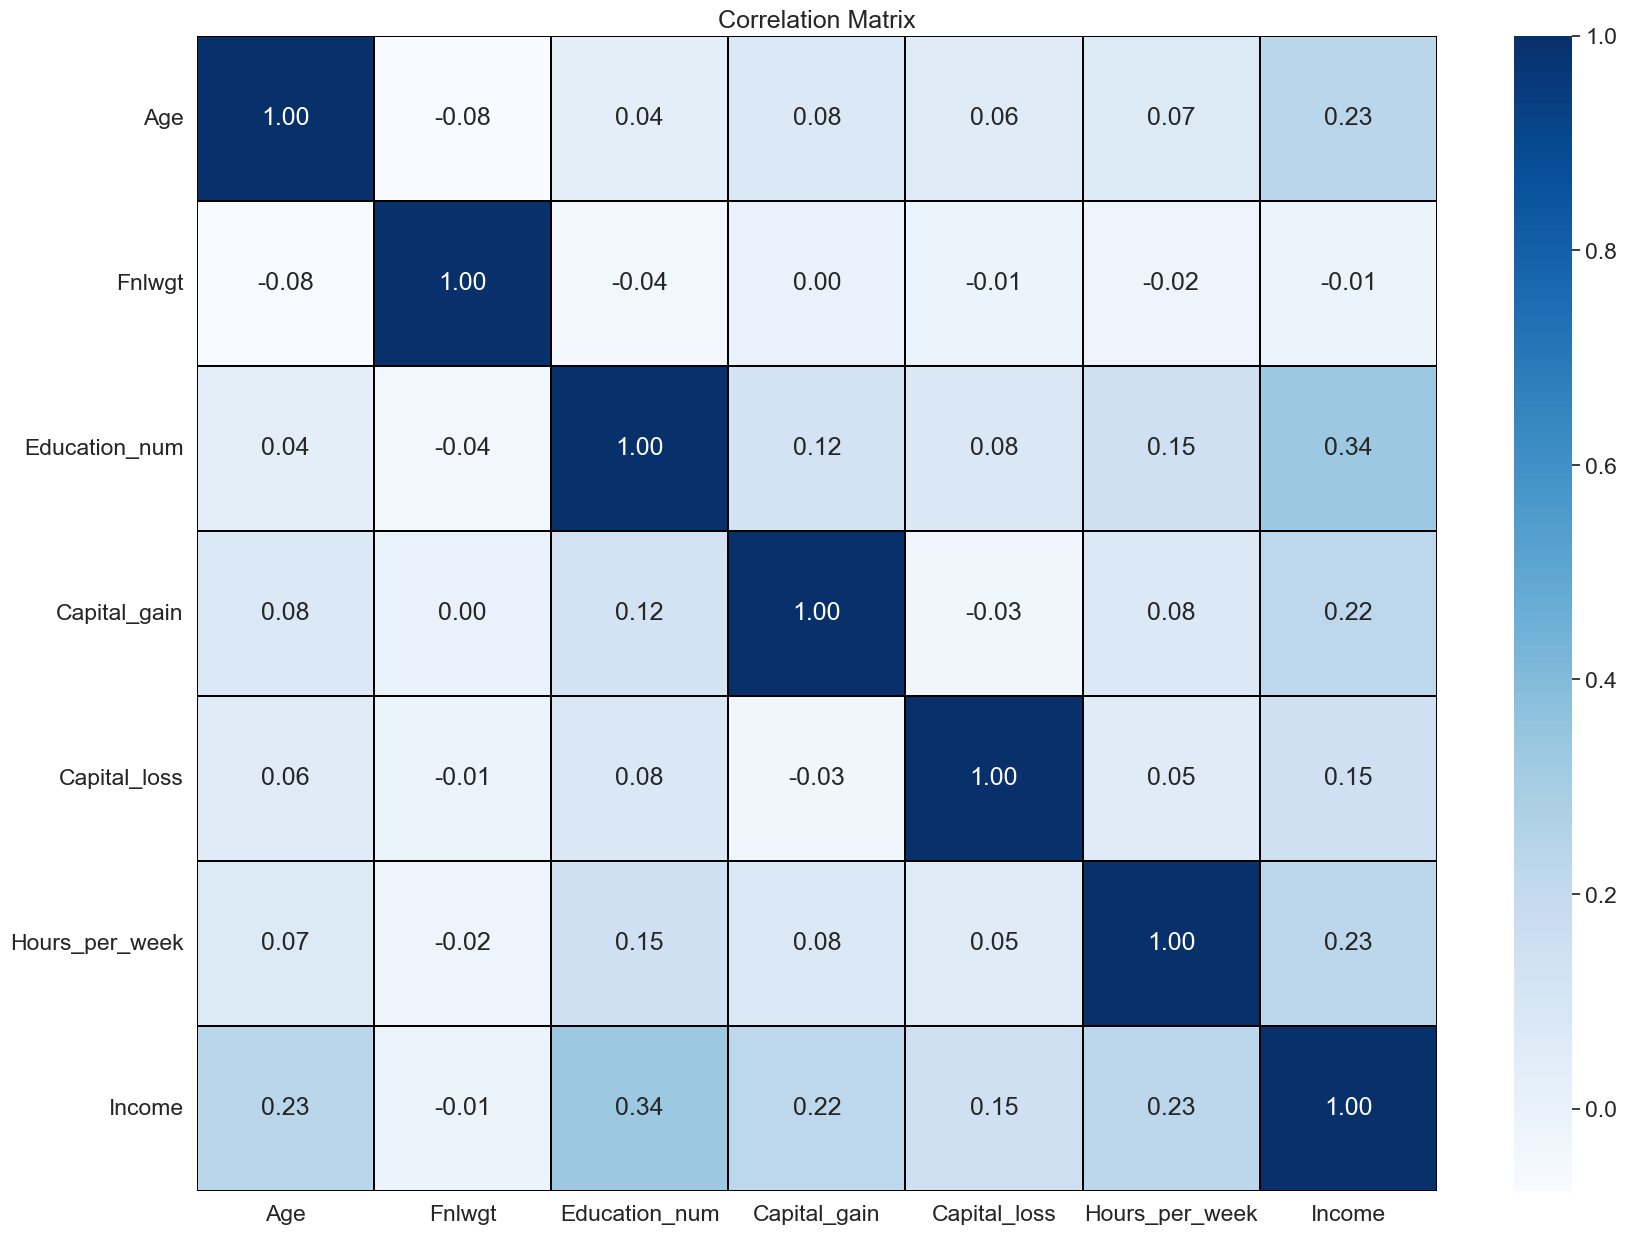

In [87]:
sns.set(font_scale=1.5)  

# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()

**=>0-no relation**

**==>-0.3 to 0.3 less relation**

**==>greater than -0.5 or 0.5 greater than(moderate correlation)**

**==>greater than -0.7 or 0.7 greater than(high correlation)**

**1) From above heatmap we can see,there are positive correlation and negative correlation between label and feature columns.**

**2)The target is medium correlated with Education_num(+0.34), and low correlated with Hours_per_week(+0.23), Age(+0.23), Capital_gain(+0.22), and Capital_loss(+0.15)**

**3)The Education_num is slightly correlated with Hours_per_week(+0.15) and Capital_gain(+0.12)**

# 2. Preprocessing Data

### 2.1 Missing values

In Section 1.4 we found out that apparently the dataset has missing values. However, in the Workclass, Occupation, and Native_country columns there are "?: Unknown" values that represent missing values. In this section, we will manage this issue.



In [88]:
# Replace Unknown for np.NaN
for col in ['Workclass', 'Occupation', 'Native_country']:
    print(f"Values for {col}:\n{df[col].value_counts(dropna=False)[:8]}\n")
    df[col] = np.where(df[col]=='Unknown', np.NaN, df[col])
    print(f"New Values for {col}:\n{df[col].value_counts(dropna=False)[:8]}\n")

Values for Workclass:
Workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: count, dtype: int64

New Values for Workclass:
Workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
NaN                  1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: count, dtype: int64

Values for Occupation:
Occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Unknown              1843
Name: count, dtype: int64

New Values for Occupation:
Occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3291

The 'Unknown' values were encoded to NaN. Now, we will check for missing values.

In [89]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
Age                       0          0.00
Workclass              1836          5.64
Fnlwgt                    0          0.00
Education                 0          0.00
Education_num             0          0.00
Marital_status            0          0.00
Occupation             1843          5.66
Relationship              0          0.00
Race                      0          0.00
Sex                       0          0.00
Capital_gain              0          0.00
Capital_loss              0          0.00
Hours_per_week            0          0.00
Native_country          582          1.79
Income                    0          0.00
Education_bk              0          0.00

In the above columns, we have missing values. For the Native_country column less than 1.80% of missing values, then we will drop them. For the other columns(Workclass and Occupation) we will impute the missing values according to the nature feature, using the mode.

## 2.1.1 Dropping missing values less than 1.8% of missing

Statistically speaking, if the number of missing observations is less than 5% of the sample, we can drop them. However, we are going to set the threshold as 2% in order to lose less than 1.8% of data.

In [90]:
cols_less_than_thr = missing_val[(missing_val['% of missing'] > 0) & (missing_val['% of missing'] < 2)].index.to_list()
cols_less_than_thr

['Native_country']

In [91]:
# Dropping the missing values with % of missing less than 2.4%
df_new = df.dropna(subset=cols_less_than_thr)

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()

582 rows with missing values were deleted.
This represent 1.79% of the data.
In the new dataset there are 31954 rows and 16 columns.


# 2.1.2 Imputing missing values

In [92]:
cols_more_than_thr = missing_val[missing_val['% of missing'] > 2].index.to_list()
cols_more_than_thr

['Workclass', 'Occupation']

For Workclass and Occupation columns we will use the mode to impute the missing values since they are categorical variables.

In [93]:
# listing the possible imputation values 
for col in cols_more_than_thr:
    print(f"Column = {col} Mode = {df[col].mode()[0]}")

Column = Workclass Mode = Private
Column = Occupation Mode = Prof-specialty


To make a more accurate analysis, we will use the mode according to Income and Education.

In [94]:
impu_val = {}

# Define Columns to group the data
group_col = ['Income','Education']

# List of mode according
for col in cols_more_than_thr:
    impu_val[col] = df.groupby(group_col)[[col]].agg(lambda x: x.mode().iloc[0])
    print(f"Imputation values for {col}:\n{impu_val[col]}\n")

Imputation values for Workclass:
                         Workclass
Income Education                  
0      Doctorate           Private
       Masters             Private
       Bachelors           Private
       Associate           Private
       Prof-school         Private
       Some-college        Private
       HS-grad             Private
       Below High School   Private
1      Doctorate           Private
       Masters             Private
       Bachelors           Private
       Associate           Private
       Prof-school         Private
       Some-college        Private
       HS-grad             Private
       Below High School   Private

Imputation values for Occupation:
                               Occupation
Income Education                         
0      Doctorate           Prof-specialty
       Masters             Prof-specialty
       Bachelors           Prof-specialty
       Associate             Adm-clerical
       Prof-school         Prof-specialty
       S

==>For Workclass we will use Private to impute the missing values.

==>For Occupation we will use the corresponding mode according to Income and Education to impute the missing values.

In [95]:
# Imputing missing values for Workclass 
impute_value = 'Private'
col = 'Workclass'
print(f"Impute the missing values in {col} with the mode: {impute_value}")

# Fill missing values with the impute value 
df[col].fillna(impute_value, inplace=True)
print(f"Missing values in {col}: {df[col].isnull().sum()}\n")

Impute the missing values in Workclass with the mode: Private
Missing values in Workclass: 0



In [97]:
 # Imputing missing values for Occupation
col = 'Occupation'
mapping_dict = impu_val[col].to_dict()
print(f"Impute the missing values in {col} with the mode:")
display(mapping_dict)

# Fill missing values with the impute value 
df[col] = df[col].fillna(df.apply(lambda row: mapping_dict[col].get((row['Income'], row['Education']), row[col]), axis=1))
print(f"Missing values in {col}: {df[col].isnull().sum()}\n")

Impute the missing values in Occupation with the mode:


{'Occupation': {(0, 'Doctorate'): 'Prof-specialty',
  (0, 'Masters'): 'Prof-specialty',
  (0, 'Bachelors'): 'Prof-specialty',
  (0, 'Associate'): 'Adm-clerical',
  (0, 'Prof-school'): 'Prof-specialty',
  (0, 'Some-college'): 'Adm-clerical',
  (0, 'HS-grad'): 'Craft-repair',
  (0, 'Below High School'): 'Other-service',
  (1, 'Doctorate'): 'Prof-specialty',
  (1, 'Masters'): 'Prof-specialty',
  (1, 'Bachelors'): 'Exec-managerial',
  (1, 'Associate'): 'Exec-managerial',
  (1, 'Prof-school'): 'Prof-specialty',
  (1, 'Some-college'): 'Exec-managerial',
  (1, 'HS-grad'): 'Craft-repair',
  (1, 'Below High School'): 'Craft-repair'}}

Missing values in Occupation: 0



# 2.1.3 Last check for missing values

In [98]:
 df.isnull().sum().sum()

0

No missing values to remove.

# 2.2 Encoding Categorical features

Preprocessing the data to train the model. As we know the models understand numbers, so it is necessary to encode the categorical data, in our case the columns Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, and Native_country. Income was encoded previously.

In [99]:
# Checking the unique values of the categorical independent variables
for i, col in enumerate(categorical_col[:-1]):
    print(f"{i+1}.{col}:\n  {df[col].unique()}\n")

1.Workclass:
  ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

2.Education:
  ['Bachelors', 'HS-grad', 'Below High School', 'Masters', 'Some-college', 'Associate', 'Doctorate', 'Prof-school']
Categories (8, object): ['Doctorate' < 'Masters' < 'Bachelors' < 'Associate' < 'Prof-school' < 'Some-college' < 'HS-grad' < 'Below High School']

3.Marital_status:
  ['Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed']
Categories (7, object): ['Married-civ-spouse' < 'Never-married' < 'Divorced' < 'Separated' < 'Widowed' < 'Married-spouse-absent' < 'Married-AF-spouse']

4.Occupation:
  ['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

5.Relationship:
  ['Husband', 'Not-in-family',

We will use LabelEncoder to encode all the categorical columns.

In [100]:
from sklearn.preprocessing import LabelEncoder

category_mappings = {}
encoding_col = categorical_col[:-1]

label_encoder = LabelEncoder()
for col in encoding_col:
    if col != 'Education':
        df[col] = df[col].astype('category')
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping in a dictionary
    category_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(col,'\n', category_mappings[col],'\n')
    
display(df.head())
display(df.tail())

Workclass 
 {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7} 

Education 
 {'Associate': 0, 'Bachelors': 1, 'Below High School': 2, 'Doctorate': 3, 'HS-grad': 4, 'Masters': 5, 'Prof-school': 6, 'Some-college': 7} 

Marital_status 
 {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6} 

Occupation 
 {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13} 

Relationship 
 {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5} 

Race 
 {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4} 

Sex 
 {'

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          5   83311          1             13               2   
1   38          3  215646          4              9               0   
2   53          3  234721          2              7               2   
3   28          3  338409          1             13               2   
4   37          3  284582          5             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           3             0     4    1             0             0   
1           5             1     4    1             0             0   
2           5             0     2    1             0             0   
3           9             5     2    0             0             0   
4           3             5     4    0             0             0   

   Hours_per_week  Native_country  Income Education_bk  
0              13              38       0    Bachelors  
1              40              38       0      HS-grad  
2              40              38       0         11th  
3              40               4       0    Bachelors  
4              40              38       0      Masters

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
32555   27          3  257302          0             12               2   
32556   40          3  154374          4              9               2   
32557   58          3  151910          4              9               6   
32558   22          3  201490          4              9               4   
32559   52          4  287927          4              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
32555          12             5     4    0             0             0   
32556           6             0     4    1             0             0   
32557           0             4     4    0             0             0   
32558           0             3     4    1             0             0   
32559           3             5     4    0         15024             0   

       Hours_per_week  Native_country  Income Education_bk  
32555              38              38       0   Assoc-acdm  
32556              40              38       1      HS-grad  
32557              40              38       0      HS-grad  
32558              20              38       0      HS-grad  
32559              40              38       1      HS-grad

In [101]:
# Drop the Education_bk column 
df.drop('Education_bk', axis=1, inplace=True)

All the categorical features were encoded. The Education_bk column is no longer needed, so we dropped it.

# 2.3 Removing outliers


We apply zscore to detect the outliers

In [102]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

Age  Workclass    Fnlwgt  Education  Education_num  \
0      0.835851   1.719607  1.006419   1.175260       1.143888   
1      0.042660   0.084402  0.245224   0.132279       0.418939   
2      1.055478   0.084402  0.425638   0.739414       1.200353   
3      0.774752   0.084402  1.406333   1.175260       1.143888   
4      0.115869   0.084402  0.897230   0.568125       1.534594   
...         ...        ...       ...        ...            ...   
32555  0.847961   0.084402  0.639212   1.611106       0.753181   
32556  0.103758   0.084402  0.334295   0.132279       0.418939   
32557  1.421524   0.084402  0.357600   0.132279       0.418939   
32558  1.214007   0.084402  0.111334   0.132279       0.418939   
32559  0.982269   0.817602  0.928868   0.132279       0.418939   

       Marital_status  Occupation  Relationship      Race       Sex  \
0            0.403777    0.697132      0.900879  0.388144  0.704503   
1            1.729469    0.201495      0.278491  0.388144  0.704503   
2            0.403777    0.201495      0.900879  1.993338  0.704503   
3            0.403777    0.789779      2.211061  1.993338  1.419441   
4            0.403777    0.697132      2.211061  0.388144  1.419441   
...               ...         ...           ...       ...       ...   
32555        0.403777    1.533235      2.211061  0.388144  1.419441   
32556        0.403777    0.046323      0.900879  0.388144  0.704503   
32557        2.247606    1.440588      1.588673  0.388144  1.419441   
32558        0.921914    1.440588      0.966285  0.388144  0.704503   
32559        0.403777    0.697132      2.211061  0.388144  1.419441   

       Capital_gain  Capital_loss  Hours_per_week  Native_country    Income  
0          0.145880      0.216076        2.221286        0.263667  0.563110  
1          0.145880      0.216076        0.034085        0.263667  0.563110  
2          0.145880      0.216076        0.034085        0.263667  0.563110  
3          0.145880      0.216076        0.034085        5.305633  0.563110  
4          0.145880      0.216076        0.034085        0.263667  0.563110  
...             ...           ...             ...             ...       ...  
32555      0.145880      0.216076        0.196100        0.263667  0.563110  
32556      0.145880      0.216076        0.034085        0.263667  1.775851  
32557      0.145880      0.216076        0.034085        0.263667  0.563110  
32558      0.145880      0.216076        1.654234        0.263667  0.563110  
32559      1.911874      0.216076        0.034085        0.263667  1.775851  

[31954 rows x 15 columns]

In [103]:
# threshold = 3.55
df_new = df[(z<3.55).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df_process = df_new.copy()
df_process

3109 rows with outliers were deleted.
This represent 9.73% of the data.
In the new dataset there are 28845 rows and 15 columns.


Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          5   83311          1             13               2   
1       38          3  215646          4              9               0   
2       53          3  234721          2              7               2   
4       37          3  284582          5             14               2   
5       49          3  160187          2              5               3   
...    ...        ...     ...        ...            ...             ...   
32555   27          3  257302          0             12               2   
32556   40          3  154374          4              9               2   
32557   58          3  151910          4              9               6   
32558   22          3  201490          4              9               4   
32559   52          4  287927          4              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               3             0     4    1             0             0   
1               5             1     4    1             0             0   
2               5             0     2    1             0             0   
4               3             5     4    0             0             0   
5               7             1     2    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          12             5     4    0             0             0   
32556           6             0     4    1             0             0   
32557           0             4     4    0             0             0   
32558           0             3     4    1             0             0   
32559           3             5     4    0         15024             0   

       Hours_per_week  Native_country  Income  
0                  13              38       0  
1                  40              38       0  
2                  40              38       0  
4                  40              38       0  
5                  16              22       0  
...               ...             ...     ...  
32555              38              38       0  
32556              40              38       1  
32557              40              38       0  
32558              20              38       0  
32559              40              38       1  

[28845 rows x 15 columns]

In order to avoid losing more than 10% of the data threshold was defined as 3.55 instead of 3. Therefore only 9.73% of the data was lost.

# 2.4 Feature Engineering

As we see in the 1.4.2 Section, the Capital_gain and Capital_loss variables have less than 10% of non-zero observations.

Therefore, we will apply feature engineering to transform the columns dividing into intervals (binning). Binning can make the interpretation of the relationship between the variable and the target more intuitive.

# 2.4.1 Discretization of Capital_gain

We will plot a histogram of the non-zero values to determine the right number of bins.

Number of bins selected for Capital_gain: 32


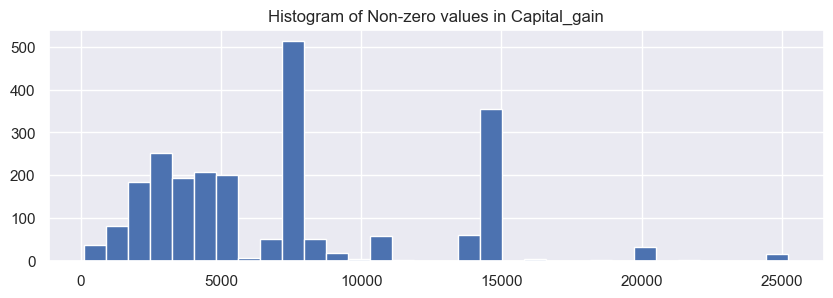

In [104]:
# Filter the non-zero values 
col = 'Capital_gain'
non_zero_values = df_process[col][df_process[col] != 0]

# Styling the plot
sns.set(font_scale=1)
plt.figure(figsize=(10, 3))

# Plot the histograma ('auto' uses a heuristic to determine the number of bins)
n, bins, _ = plt.hist(non_zero_values, bins='auto') 
plt.title(f"Histogram of Non-zero values in {col}")

# Get the number of bins chosen automatically
num_bins_auto = len(bins) - 1
print(f'Number of bins selected for {col}: {num_bins_auto}')
plt.show()

Now, we will divide the continuous variable into 32 discrete intervals or bins.

In [105]:
# Dividing into intervals 
df_process[f'{col}_bin'] = pd.cut(df_process[col], bins=num_bins_auto, labels=False, include_lowest=True)

# Review the unique values of the new variable Capital_gain_bin
print(f"Unique values in {col}_bin: \n{df_process[f'{col}_bin'].unique()}\n")
print(f"Total of unique values in {col}_bin: {df_process[f'{col}_bin'].nunique()}")
print(f"Counts of {col}_bin:\n{df_process[f'{col}_bin'].value_counts()}")

Unique values in Capital_gain_bin: 
[ 0 17  6  3 18 19  9  5  1  4  2 25  8 10 31 13  7 27 11 20 12 14 23]

Total of unique values in Capital_gain_bin: 23
Counts of Capital_gain_bin:
Capital_gain_bin
0     26551
9       512
19      330
3       288
6       217
4       194
5       186
2       148
1        80
17       61
13       59
10       54
8        54
25       32
18       24
11       18
31       15
7         9
20        4
12        4
14        2
23        2
27        1
Name: count, dtype: int64


# 2.4.2 Discretization of Capital_loss¶

We will apply the same steps for Capital_loss.

Number of bins selected for Capital_loss: 9


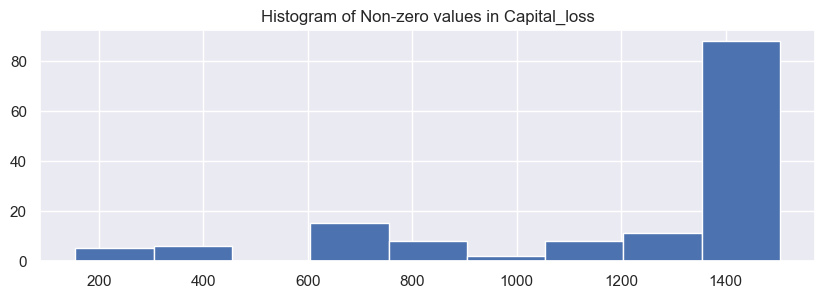

In [106]:
# Filter the non-zero values 
col = 'Capital_loss'
non_zero_values = df_process[col][df_process[col] != 0]

# Styling the plot
sns.set(font_scale=1)
plt.figure(figsize=(10, 3))

# Plot the histograma ('auto' uses a heuristic to determine the number of bins)
n, bins, _ = plt.hist(non_zero_values, bins='auto') 
plt.title(f"Histogram of Non-zero values in {col}")

# Get the number of bins chosen automatically
num_bins_auto = len(bins) - 1
print(f'Number of bins selected for {col}: {num_bins_auto}')
plt.show()

Now, we will divide the continuous variable into 9 discrete intervals or bins.

In [107]:
# Dividing into intervals 
df_process[f'{col}_bin'] = pd.cut(df_process[col], bins=num_bins_auto, labels=False, include_lowest=True)

# Review the unique values of the new variable Capital_gain_bin
print(f"Unique values in {col}_bin: \n{df_process[f'{col}_bin'].unique()}\n")
print(f"Total of unique values in {col}_bin: {df_process[f'{col}_bin'].nunique()}")
print(f"Counts of {col}_bin:\n{df_process[f'{col}_bin'].value_counts()}")

Unique values in Capital_loss_bin: 
[0 8 3 2 6 1 5 4 7]

Total of unique values in Capital_loss_bin: 9
Counts of Capital_loss_bin:
Capital_loss_bin
0    28703
8       95
3       15
6        8
5        8
1        7
7        4
2        3
4        2
Name: count, dtype: int64


In [109]:
 #Drop the no-needed columns
df_process.drop(['Capital_gain','Capital_loss'], axis=1, inplace=True)

# 2.5 Skewness Correction

In [111]:
# Checking the skewness in the data
df_skew = df_process.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

Skew
Capital_loss_bin  15.529717
Capital_gain_bin   5.275433
Income             1.320063
Relationship       0.754405
Fnlwgt             0.746847
Age                0.527576
Occupation         0.151426
Workclass          0.097738
Education          0.056501
Marital_status    -0.036860
Hours_per_week    -0.184656
Education_num     -0.284879
Sex               -0.690167
Race              -2.433020
Native_country    -4.600376

**Skewness acceptable range -0.5 to +0.5**

Considering the skewness of the continuous numerical columns:

==>Fnlwgt (0.746847)
==>Age (0.527576)

We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.

In [112]:
# Checking skewness using cuberoot, square-root and log method
skew_columns = ['Fnlwgt', 'Age']
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df_process[col])
    df_transformed[f"{col}_log"] = np.log(df_process[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df_process[col])
        
# Adding the other columns
df_transformed = pd.concat([df_transformed, df_process[skew_columns]], axis=1)

In [113]:
# Comparing which transform method give better results
df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

Skewness
Fnlwgt_sqrt -0.035246
Fnlwgt_log  -0.908114
Fnlwgt_cbrt -0.316659
Fnlwgt       0.746847
Age_sqrt     0.194771
Age_log     -0.126909
Age_cbrt     0.086393
Age          0.527576

After comparing the resulting skewness, we are going to apply the square-root method for the Fnlwgt feature, and cube-root method to Age.

In [114]:
# Selecting columns to apply cube-root transform method
cbrt_columns = ['Age']
print(cbrt_columns)

# Update the df dataset with the transfor data with cube-root method.
for col in cbrt_columns:
    df_process[col] = np.cbrt(df_process[col])

['Age']


In [115]:
# Transform the Fnlwgt column - sqrt
df_process['Fnlwgt'] = np.sqrt(df_process['Fnlwgt'])

In [116]:
df_process[skew_columns].skew().sort_values(ascending=False).to_frame("Skewness after transform")

Skewness after transform
Age                     0.086393
Fnlwgt                 -0.035246

After transform the data with cube-root and log method, we can continue with the analysis.

# 2.6 Feature Scaling using Standard Scalarization

### 2.6.1 Separating features and label

In [117]:
# Separating the independent and target variables into x and y 
x = df_process.drop('Income', axis=1)
y = df_process['Income']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (28845, 14)
Label Dimension = (28845,)


# 2.6.2 Scaling

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

display(x.head())

Age  Workclass    Fnlwgt  Education  Education_num  Marital_status  \
0  0.904819   1.726035 -1.112185  -1.177596       1.187509       -0.408553   
1  0.095449  -0.082347  0.410722   0.125982      -0.417519       -1.725132   
2  1.086404  -0.082347  0.584929  -0.743070      -1.220032       -0.408553   
3  0.020674  -0.082347  1.009391   0.560508       1.588766       -0.408553   
4  0.842680  -0.082347 -0.145122  -0.743070      -2.022546        0.249737   

   Occupation  Relationship      Race       Sex  Hours_per_week  \
0   -0.686745     -0.914442  0.377905  0.712796       -2.301102   
1   -0.193003     -0.291430  0.377905  0.712796        0.000783   
2   -0.193003     -0.914442 -2.286642  0.712796        0.000783   
3   -0.686745      2.200617  0.377905 -1.402927        0.000783   
4    0.300738     -0.291430 -2.286642 -1.402927       -2.045337   

   Native_country  Capital_gain_bin  Capital_loss_bin  
0        0.226978         -0.236065         -0.066679  
1        0.226978         -0.236065         -0.066679  
2        0.226978         -0.236065         -0.066679  
3        0.226978         -0.236065         -0.066679  
4       -5.100811         -0.236065         -0.066679

We have scaled the data using the Standard Scalarization method to overcome the issue of biases

# 2.7 Muticollinearity Analysis and Feature Selection

### 2.7.1 Checking Variance Inflation Factor (VIF)

In [119]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
7       Relationship    1.670579
9                Sex    1.546381
0                Age    1.211506
5     Marital_status    1.155208
10    Hours_per_week    1.131492
4      Education_num    1.084493
11    Native_country    1.067194
8               Race    1.065326
12  Capital_gain_bin    1.048869
3          Education    1.020756
6         Occupation    1.019756
2             Fnlwgt    1.017156
1          Workclass    1.009082
13  Capital_loss_bin    1.001837

As we can see after the standardization there is no multicollinearit issue (No value is greater than 10). Infinite values correspond to categorical features. We can continue with model building.

Now we are going to balance the dataset and then move ahead from model building.

# 2.8 Balancing the Dataset

As we see previously in the Section 1.6.1.1. The dataset is imbalance: 24697 (75.9%) records for "<=50K" and only 7839 (24.1%) records as ">50K". So, we are going to apply SMOTE for oversampling the data.

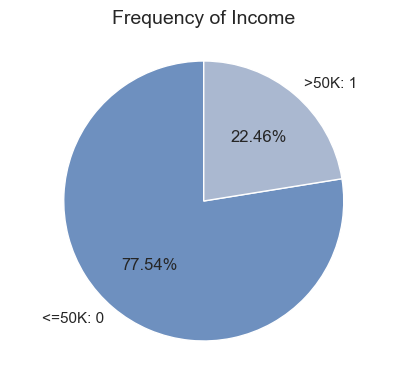

In [120]:
# Count the frequencies of target
target_counts = y.value_counts()

# Create a pie plot
sns.set_palette('vlag')
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['<=50K: 0', '>50K: 1'], autopct='%1.2f%%', startangle=90)

plt.title("Frequency of Income", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

After processing the data, the dataset is still imbalanced: 77.54% for an income <=50K and 22.46% for an income >50K.

In [121]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

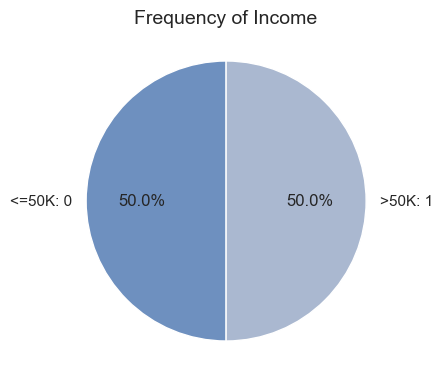

In [122]:
# Count the frequencies of target
target_counts = y1.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['<=50K: 0', '>50K: 1'], autopct='%1.1f%%', startangle=90)

plt.title("Frequency of Income", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [123]:
X = x1
Y = y1

Since the data is balanced, we can build machine learning classification models.

# 3. Modeling

### 3.1 Finding the best random state

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [125]:
%%time
# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9043 at random_state 49
CPU times: total: 21min 34s
Wall time: 26min 4s


Best accuracy is 90.43% at random_state 49

# 3.2 Creating train test split

In [126]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (31313, 14)
x_test shape:   (13421, 14)
y_train shape:  (31313,)
y_test shape:   (13421,)


# 3.3 Classification Algorithms

In [127]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

### Creating a Function with accuracy score,confusion matrix,classification report and difference between accuracy score and cross validation

In [128]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================Train Result=============")
        
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")  #accuracy score for train result
              
    
    elif train==False:
        pred=clf.predict(x_test)
              
        print("\n================Test Result=============")
        
        print(f" \n Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")  #accuracy score for test result
        
        print(f"  \n \n Confusion matrix: \n {confusion_matrix(y_test,pred)}") #confusion matrix for test result
              
        print("\n \n Test Classification Report \n",classification_report(y_test,pred,digits=2)) #classification result for test result
        
        
        score=cross_val_score(clf,x,y)
        print('\n', score)
        print('\n' ,score.mean())
        print(" \n \n Difference between accuracy score and cross validation is:",accuracy_score(y_test,pred)-score.mean()) #Difference between accuracy score and cross validation(to find which model is best)

# 3.3.1 LogisticRegression

In [129]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [130]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:77.09%

================Test Result=============
 
 Accuracy Score:77.37%
  
 
 Confusion matrix: 
 [[5105 1545]
 [1492 5279]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      6650
           1       0.77      0.78      0.78      6771

    accuracy                           0.77     13421
   macro avg       0.77      0.77      0.77     13421
weighted avg       0.77      0.77      0.77     13421


 [0.82579303 0.8282198  0.83133992 0.82891316 0.83029988]

 0.828913156526261
 
 
 Difference between accuracy score and cross validation is: -0.05520031843669981


# 3.3.2 RandomForestClassifier

In [131]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [132]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 Accuracy Score:90.46%
  
 
 Confusion matrix: 
 [[5920  730]
 [ 551 6220]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      6650
           1       0.89      0.92      0.91      6771

    accuracy                           0.90     13421
   macro avg       0.90      0.90      0.90     13421
weighted avg       0.90      0.90      0.90     13421


 [0.8424337  0.84642052 0.84832727 0.85560756 0.85127405]

 0.8488126191714335
 
 
 Difference between accuracy score and cross validation is: 0.0557399477013778


# 3.3.3 SVC(Support Vector Machine Classifier)

In [133]:
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [134]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:84.02%

================Test Result=============
 
 Accuracy Score:84.29%
  
 
 Confusion matrix: 
 [[5179 1471]
 [ 638 6133]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      6650
           1       0.81      0.91      0.85      6771

    accuracy                           0.84     13421
   macro avg       0.85      0.84      0.84     13421
weighted avg       0.85      0.84      0.84     13421


 [0.84260704 0.84971399 0.85058069 0.8566476  0.84988733]

 0.8498873288264864
 
 
 Difference between accuracy score and cross validation is: -0.0070291215393990525


# 3.3.4 GradientBoostingClassifier

In [135]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [136]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:86.78%

================Test Result=============
 
 Accuracy Score:87.47%
  
 
 Confusion matrix: 
 [[5625 1025]
 [ 657 6114]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      6650
           1       0.86      0.90      0.88      6771

    accuracy                           0.87     13421
   macro avg       0.88      0.87      0.87     13421
weighted avg       0.88      0.87      0.87     13421


 [0.85370081 0.85682094 0.858381   0.86548795 0.86046109]

 0.8589703588143525
 
 
 Difference between accuracy score and cross validation is: 0.015703659515131196


# 3.3.5 AdaBoostClassifier

In [137]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [138]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:85.11%

================Test Result=============
 
 Accuracy Score:85.93%
  
 
 Confusion matrix: 
 [[5584 1066]
 [ 823 5948]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      6650
           1       0.85      0.88      0.86      6771

    accuracy                           0.86     13421
   macro avg       0.86      0.86      0.86     13421
weighted avg       0.86      0.86      0.86     13421


 [0.85196741 0.85248743 0.85612758 0.8601144  0.85942104]

 0.8560235742763045
 
 
 Difference between accuracy score and cross validation is: 0.0032268541567481712


# 3.3.6 BaggingClassifier

In [139]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [140]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:99.23%

================Test Result=============
 
 Accuracy Score:88.33%
  
 
 Confusion matrix: 
 [[5919  731]
 [ 835 5936]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      6650
           1       0.89      0.88      0.88      6771

    accuracy                           0.88     13421
   macro avg       0.88      0.88      0.88     13421
weighted avg       0.88      0.88      0.88     13421


 [0.83654013 0.83411336 0.83914023 0.84434044 0.83775351]

 0.8383775351014041
 
 
 Difference between accuracy score and cross validation is: 0.044939654377770366


# 3.3.7 ExtraTreesClassifier

In [141]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [142]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 Accuracy Score:91.20%
  
 
 Confusion matrix: 
 [[5920  730]
 [ 451 6320]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      6650
           1       0.90      0.93      0.91      6771

    accuracy                           0.91     13421
   macro avg       0.91      0.91      0.91     13421
weighted avg       0.91      0.91      0.91     13421


 [0.84122032 0.84052695 0.84312706 0.84746057 0.8441671 ]

 0.843300398682614
 
 
 Difference between accuracy score and cross validation is: 0.06870317780199975


# 3.3.8 DecisionTreeClassifier

In [144]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [145]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 Accuracy Score:85.86%
  
 
 Confusion matrix: 
 [[5687  963]
 [ 935 5836]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      6650
           1       0.86      0.86      0.86      6771

    accuracy                           0.86     13421
   macro avg       0.86      0.86      0.86     13421
weighted avg       0.86      0.86      0.86     13421


 [0.80776564 0.79649853 0.80377882 0.81279251 0.79563183]

 0.8032934650719362
 
 
 Difference between accuracy score and cross validation is: 0.05528637249605428


**The model with the best accuracy is ExtraTreesClassifier with 91.20% of accuracy.**

After applying cross-validation technique we observe the better cross-validation score is for ExtraTreesClassifier and the difference with accuracy score is  0.068703 confirming as follows:

**ExtraTreesClassifier is our best Model**

# 3.4 Hyper Parameter Tuning

### 3.4.1 Finding the best parameters for ExtraTreesClassifier

In [146]:
random_state

49

In [147]:
model = ExtraTreesClassifier()
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [148]:
# ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
             'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
             'min_samples_leaf': np.arange(1, 5),  # Vary the minimum samples required for a leaf
             'n_estimators': np.arange(50, 310, 10),  # Vary the number of trees
             'max_depth': [None] + list(np.arange(20, 110, 10)),  # Vary the maximum depth of trees
             'max_features': ['auto', 'sqrt', 'log2'],
             'random_state': [random_state, 50, 500, 1000],
             'n_jobs': [-1, -1, 1]
             }

# Build the model 
model = ExtraTreesClassifier()

In [149]:
%%time 

# Perform search with cross validation
# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, 
                                   n_iter=10, scoring='accuracy', cv=3, 
                                   random_state=random_state, n_jobs=-1)
# Fit the model 
random_search.fit(x_train, y_train)

CPU times: total: 15.8 s
Wall time: 41.5 s


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]),
                                        'n_jobs': [-1, -1, 1],
                                        'random_state': [49, 50, 500, 1000]},
                   random_state=49, scoring='accuracy')

In [150]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for ExtraTreesClassifier model:")
display(best_params)

Best Parameters for ExtraTreesClassifier model:


{'random_state': 500,
 'n_jobs': -1,
 'n_estimators': 300,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': False}

In [151]:
best_model

ExtraTreesClassifier(max_depth=40, min_samples_split=3, n_estimators=300,
                     n_jobs=-1, random_state=500)

# 3.5 Final Model

In [152]:
# Create the model with the best parameters
best_model = ExtraTreesClassifier (criterion = 'gini',
                                   bootstrap = False,
                                   max_depth = 40,
                                   max_features = 'sqrt',
                                   min_samples_split = 3,
                                   min_samples_leaf = 1,
                                   n_estimators = 300,
                                   n_jobs = -1, 
                                   random_state = 500)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 91.39%


# 3.5.1 Saving the model

In [153]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "model/census_income_model.pkl")

['model/census_income_model.pkl']

# 3.5.2 Predicting the saved model

In [154]:
# Lets load the saved model and get the predictions
model = joblib.load("model/census_income_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 91.394 %


0      1      2      3      4      5      6      7      8      \
Predicted      0      0      1      0      1      1      0      1      1   
Original       0      0      1      0      1      0      0      1      1   

           9      ...  13411  13412  13413  13414  13415  13416  13417  13418  \
Predicted      1  ...      0      1      0      1      1      0      0      0   
Original       1  ...      0      1      0      1      0      0      0      0   

           13419  13420  
Predicted      0      1  
Original       0      1  

[2 rows x 13421 columns]

These are the predicted values in the fraction of the dataset we appart for testing to compare the prediction with accuracy of 91.394%.

### Final Conclusions:

**The best model was ExtraTreesClassifier with accuracy_score: 91.394%**

**Note: While conducting data analysis, I explored various approaches from different sources. These references served as inspiration during the exploratory data analysis (EDA) process, but I refrained from directly copying the analysis or code**